**Introduction**

For my Capstone project I am trying to look at videogames sales and their relationship to countries and genres. The question I am wanting to explore in this project is if the popularity of video games has changed over time. More specifically, has the popularity changed not just by the number of individual purchases but by other metrics such as genre and location. These metrics are important because they can give insight into deeper questions for businesses to gain a competitive edge. 

**Sub-Population**

North American, Japan, European Union countries

**Data Source**

The data source I will use will be from kaggle.com titled  ‘Video Game Sales and Ratings’. The link to the data is below: https://www.kaggle.com/kendallgillies/video-game-sales-and-ratings
This dataset contains a list of game sales since january 2017. It focuses on sales with greater than 100,000 copies but also includes other interesting pieces of data such as critic and user ratings.

**Research Design**
*Hypothesis*
Ho: There Is Not Significant Difference Between video game sales with genres or countries
Ha: There Is a Significant Difference Between video game sales with genres or countries

**Methodology**
Display heatmaps, barplots, histograms, and linear regression plots to look for distribution patterns and correlations

If data does appear normal t-Testing on sales (Primary Variable) For all Sub-Populations.
If data does not appear normal than a Kruskal Wallis or Mann Whitney will have to be performed.
Chi-Square tests for categorical variables are possible to look at relationships between companies and genres as well as linear regression to compare sales to genres

**Purpose**

The results of my analysis will be useful to stakeholders for different gaming platforms. It will give them insight into what geographical areas and genres they are successful in as well as new markets to tap into to increase profits.


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/video-game-sales-and-ratings/Video_Game_Sales_as_of_Jan_2017.csv


In [2]:
#import df and libraries
%matplotlib inline
!pip install
#!pip install pdfminer
import pandas as pd
import numpy as np
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
import os

if not os.path.exists("images"):
    os.mkdir("images")
from sklearn import linear_model
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare
from matplotlib.ticker import FormatStrFormatter
from matplotlib import pyplot

ERROR: You must give at least one requirement to install (see "pip help install")
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [3]:
#import df and get rid of null values and check header for first few values to make sure df was imported properly
data = pd.read_csv('../input/video-game-sales-and-ratings/Video_Game_Sales_as_of_Jan_2017.csv')
data_new = data.dropna()
data_new.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76.0,51.0,8.0,324.0,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,82.0,73.0,8.3,712.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,80.0,73.0,8.0,193.0,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.15,6.50,2.88,29.81,89.0,65.0,8.5,433.0,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,E


In [4]:
#check all columns to understand what data I have to work with
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7112 entries, 0 to 17407
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             7112 non-null   object 
 1   Platform         7112 non-null   object 
 2   Year_of_Release  7112 non-null   float64
 3   Genre            7112 non-null   object 
 4   Publisher        7112 non-null   object 
 5   NA_Sales         7112 non-null   float64
 6   EU_Sales         7112 non-null   float64
 7   JP_Sales         7112 non-null   float64
 8   Other_Sales      7112 non-null   float64
 9   Global_Sales     7112 non-null   float64
 10  Critic_Score     7112 non-null   float64
 11  Critic_Count     7112 non-null   float64
 12  User_Score       7112 non-null   float64
 13  User_Count       7112 non-null   float64
 14  Rating           7112 non-null   object 
dtypes: float64(10), object(5)
memory usage: 889.0+ KB


I have a lots of different columns to observe but I first need to know what unique values I am working with so that I can organize the data.

In [5]:
#I need to know lower limit of year since I know from kaggle that the upper limit is January 2017
data.Year_of_Release.min()

1976.0

In [6]:
#to see bias versus platforms
data_new.Platform.unique()

array(['Wii', 'DS', 'X360', 'PS3', 'PS2', 'PS4', '3DS', 'PS', 'X', 'PC',
       'PSP', 'WiiU', 'GC', 'GBA', 'XOne', 'PSV', 'DC'], dtype=object)

In [7]:
data_new.Publisher.unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Electronic Arts', 'Bethesda Softworks', 'SquareSoft',
       'GT Interactive', 'Konami Digital Entertainment', 'Square Enix',
       'Sony Computer Entertainment Europe', 'Virgin Interactive',
       'LucasArts', '505 Games', 'Warner Bros. Interactive Entertainment',
       'Capcom', 'Universal Interactive', 'RedOctane', 'Atari',
       'Eidos Interactive', 'Namco Bandai Games', 'Vivendi Games',
       'MTV Games', 'Sega', 'THQ', 'Disney Interactive Studios',
       'Acclaim Entertainment', 'Midway Games', 'Deep Silver', 'NCSoft',
       'Tecmo Koei', 'Valve Software', 'Infogrames', 'Hello Games',
       'Mindscape', 'Valve', 'Global Star', 'Gotham Games',
       'Crave Entertainment', 'Hasbro Interactive', 'Codemasters',
       'TDK Mediactive', 'Zoo Games', 'Sony Online Entertainment', 'RTL',
       'D3Publisher', 'Black Label Games', 'SouthPeak 

It appears that I am missing many platforms before the late 1990's such as Sega genesis, Sega Saturn, Nintendo Gameboy, Nintendo 64, and many others. Now I need to organize the platforms by company (Microsoft, Sega, Sony, and Nintendo) to understand the bias of the dataset

In [8]:
# Omitting video games released in 2017.
data_new = data_new.loc[data.Year_of_Release < 2017]

data_new = data_new.dropna()

# organizing all platforms
sony = ('PS','PS2','PS3','PS4' ,'PSP','PSV')
microsoft = ('PC','X360','XB','XOne', 'X')
nintendo = ('3DS','DS','GBA','GC', 'Wii','WiiU', 'GBA', 'GC')
sega = ('DC')

# using df.loc to create new column "Company"
data_new.loc[data['Platform'].isin(['PS','PS2','PS3','PS4' ,'PSP','PSV']), 'Company'] = 'Sony'
data_new.loc[data['Platform'].isin(['PC','X360','X','XOne']), 'Company'] = 'Microsoft'
data_new.loc[data['Platform'].isin(['3DS','DS','GBA','GC','N64','Wii','WiiU', 'GB', 'GBA', 'GC']), 'Company'] = 'Nintendo'
data_new.loc[data['Platform'].isin(['DC']), 'Company'] = 'Sega'

# view result
data_new.info()
print(data_new.groupby('Company').count())
#created company column was a success

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7112 entries, 0 to 17407
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             7112 non-null   object 
 1   Platform         7112 non-null   object 
 2   Year_of_Release  7112 non-null   float64
 3   Genre            7112 non-null   object 
 4   Publisher        7112 non-null   object 
 5   NA_Sales         7112 non-null   float64
 6   EU_Sales         7112 non-null   float64
 7   JP_Sales         7112 non-null   float64
 8   Other_Sales      7112 non-null   float64
 9   Global_Sales     7112 non-null   float64
 10  Critic_Score     7112 non-null   float64
 11  Critic_Count     7112 non-null   float64
 12  User_Score       7112 non-null   float64
 13  User_Count       7112 non-null   float64
 14  Rating           7112 non-null   object 
 15  Company          7112 non-null   object 
dtypes: float64(10), object(6)
memory usage: 944.6+ KB
         

Now that I organized data by company

In [9]:
# Calculate correlations
corr = data_new.corr()
# Heatmap
plt.rcParams['font.size'] = 20
ax.set_title('Correlations of Video Game Sales Since 2017')
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(corr, ax = ax, cmap = 'coolwarm')


NameError: name 'ax' is not defined

Looks like the sales columns have strong correlations with each other and so does user and critic scores. However critic scores from the data.head() earlier were from 1-100 while user scores were from 1-10. I will have to manipulate that later but for now lets do a quick look for outliers.

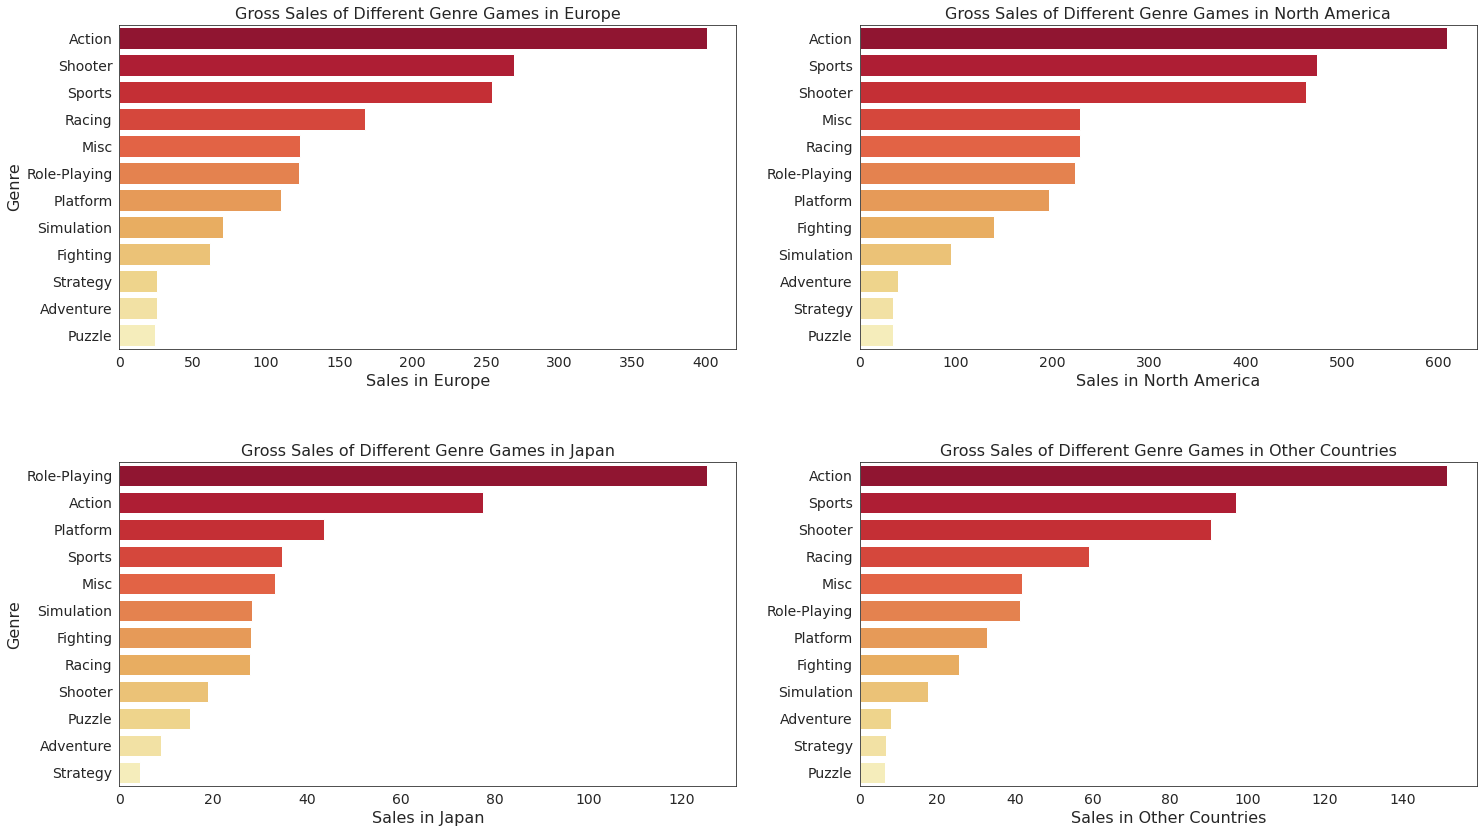

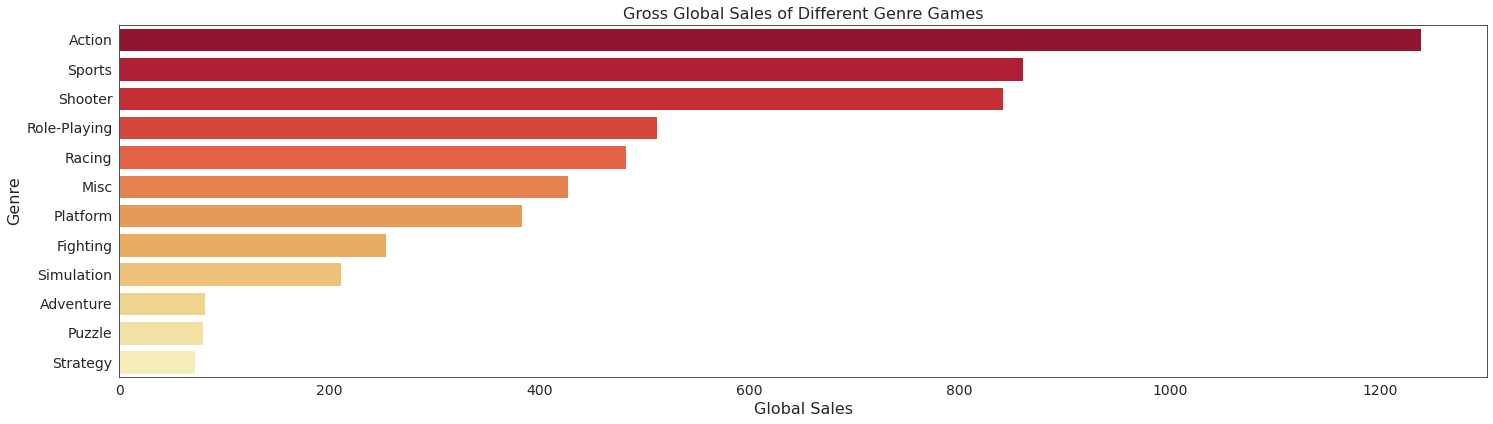

In [10]:
fig=plt.figure(figsize=(29,14))
plt.subplots_adjust(left=0.25, wspace=0.20, hspace=0.35)
sns.set_style("white")

plt.subplot(2, 2, 1)
plt.title('Gross Sales of Different Genre Games in Europe',fontdict={'fontsize':16})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.barplot(y='Genre', x='EU_Sales', data=data_new.groupby('Genre').sum().EU_Sales.sort_values(ascending=False).reset_index(),palette='YlOrRd_r');
plt.ylabel('Genre',fontdict={'fontsize':16})
plt.xlabel('Sales in Europe',fontdict={'fontsize':16})

plt.subplot(2, 2, 2)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Gross Sales of Different Genre Games in North America',fontdict={'fontsize':16})
sns.barplot(y='Genre', x='NA_Sales', data=data_new.groupby('Genre').sum().NA_Sales.sort_values(ascending=False).reset_index(),palette='YlOrRd_r');
plt.ylabel('',fontdict={'fontsize':16})
plt.xlabel('Sales in North America',fontdict={'fontsize':16})

plt.subplot(2, 2, 3)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Gross Sales of Different Genre Games in Japan',fontdict={'fontsize':16})
sns.barplot(y='Genre', x='JP_Sales', data=data_new.groupby('Genre').sum().JP_Sales.sort_values(ascending=False).reset_index(),palette='YlOrRd_r');
plt.ylabel('Genre',fontdict={'fontsize':16})
plt.xlabel('Sales in Japan',fontdict={'fontsize':16})


plt.subplot(2, 2, 4)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Gross Sales of Different Genre Games in Other Countries',fontdict={'fontsize':16})
sns.barplot(y='Genre', x='Other_Sales', data=data_new.groupby('Genre').sum().Other_Sales.sort_values(ascending=False).reset_index(),palette='YlOrRd_r');
plt.ylabel('',fontdict={'fontsize':16})
plt.xlabel('Sales in Other Countries',fontdict={'fontsize':16})

fig=plt.figure(figsize=(24.5,22))
plt.subplot2grid((3,1), (1,0))
sns.set_style("white")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Gross Global Sales of Different Genre Games',fontdict={'fontsize':16})
sns.barplot(y='Genre', x='Global_Sales', data=data_new.groupby('Genre').sum().Global_Sales.sort_values(ascending=False).reset_index(),palette='YlOrRd_r');
plt.ylabel('Genre',fontdict={'fontsize':16})
plt.xlabel('Global Sales',fontdict={'fontsize':16});

In [11]:
# to see and base outliers
data_new[['User_Score', 'Critic_Score', 'Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales']].describe()

,User_Score,Critic_Score,Global_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,7112.000000,7112.000000,7112.000000,7112.000000,7112.000000,7112.000000,7112.000000
mean,7.176378,70.229471,0.765307,0.388567,0.232537,0.062652,0.081347
std,1.444496,13.896252,1.936692,0.953982,0.680028,0.283475,0.265864
min,0.500000,13.000000,0.010000,0.000000,0.000000,0.000000,0.000000
25%,6.500000,62.000000,0.110000,0.060000,0.020000,0.000000,0.010000
50%,7.500000,72.000000,0.290000,0.150000,0.060000,0.000000,0.020000
75%,8.200000,80.000000,0.742500,0.390000,0.202500,0.010000,0.070000
max,9.600000,98.000000,82.540000,41.360000,28.960000,6.500000,10.570000


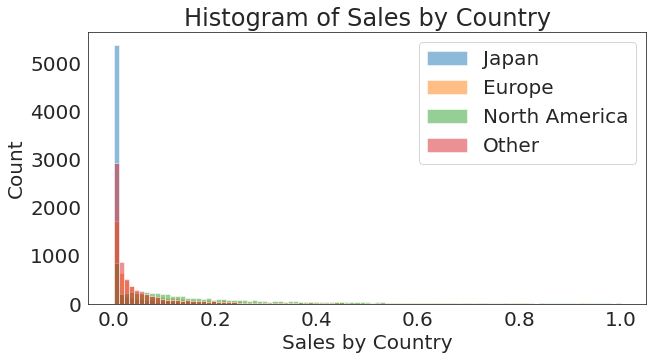

KruskalResult(statistic=8160.422665161177, pvalue=0.0)

In [12]:
bins = np.linspace(0, 1, 100)
pyplot.figure(figsize=[10,5])
pyplot.hist(data_new['JP_Sales'], bins, alpha=0.5, label='Japan')
pyplot.hist(data_new['EU_Sales'], bins, alpha=0.5, label='Europe')
pyplot.hist(data_new['NA_Sales'], bins, alpha=0.5, label='North America')
pyplot.hist(data_new['Other_Sales'], bins, alpha=0.5, label='Other')
pyplot.legend(loc='upper right')
pyplot.ylabel('Count')
pyplot.xlabel('Sales by Country')
pyplot.title('Histogram of Sales by Country')
pyplot.show()
# because looking at multiple columns the data doesn't appear normallly distributed run kruskal-Wallis to test significance
stats.kruskal(data_new['Other_Sales'], data_new['JP_Sales'], data_new['NA_Sales'], data_new['EU_Sales'])

Since none of the sales columns appear to be normally distributed a Kurskall-Wallis analysis is needed to make sure the distributions are statistically different. Due to the p-value being <.05 each sales column is statistically different despite having correlations in the heatmap. We can therefore reject the null for the distribution of global sales and countries.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


           Genre  Rev_Critic_Score  User_Score
0         Action          6.782038    7.090165
1      Adventure          6.601923    7.143846
2       Fighting          6.988776    7.308418
3           Misc          6.766667    6.869674
4       Platform          6.992718    7.348544
5         Puzzle          7.111024    7.289764
6         Racing          6.950167    7.084833
7   Role-Playing          7.271583    7.599323
8        Shooter          7.089444    7.055222
9     Simulation          7.006731    7.195192
10        Sports          7.403262    7.119878
11      Strategy          7.254110    7.317123


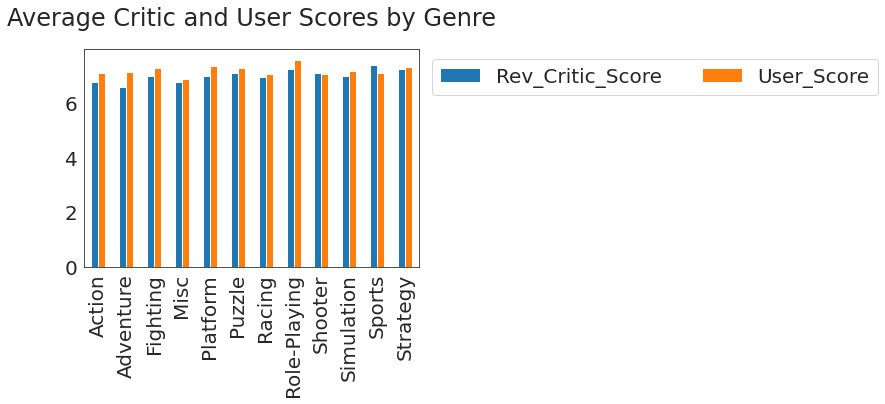

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7112 entries, 0 to 17407
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              7112 non-null   object 
 1   Platform          7112 non-null   object 
 2   Year_of_Release   7112 non-null   float64
 3   Genre             7112 non-null   object 
 4   Publisher         7112 non-null   object 
 5   NA_Sales          7112 non-null   float64
 6   EU_Sales          7112 non-null   float64
 7   JP_Sales          7112 non-null   float64
 8   Other_Sales       7112 non-null   float64
 9   Global_Sales      7112 non-null   float64
 10  Critic_Score      7112 non-null   float64
 11  Critic_Count      7112 non-null   float64
 12  User_Score        7112 non-null   float64
 13  User_Count        7112 non-null   float64
 14  Rating            7112 non-null   object 
 15  Company           7112 non-null   object 
 16  Rev_Critic_Score  7112 non-null   float64

In [13]:
# reduced critic scores from 1-100 to 1-10 to make them more comparable to user scores that are from 1-10
data_new['Rev_Critic_Score'] = data['Critic_Score'] * .1
#printing calculation to verify column works
data_score = data_new.groupby('Genre')['Rev_Critic_Score', 'User_Score'].mean().reset_index()
print(data_new.groupby('Genre')['Rev_Critic_Score', 'User_Score'].mean().reset_index())
#groupby and graph to see how they compare visually
data_score.plot( kind = 'bar',legend = True)
ax = plt.axes()
plt.title('Average Critic and User Scores by Genre', y = 1.08)
ax.set_xticklabels (data_score['Genre'])
plt.legend(loc="upper right", bbox_to_anchor=(2.4, 1.0), ncol=2)
plt.show()
print(data_new.info())

There doesn't appear to be a large difference between user scores and critic scores(when they are set to same scale). However lets check they are normally distributed and than do some stat tests to check.

p = 0
The null hypothesis can be rejected


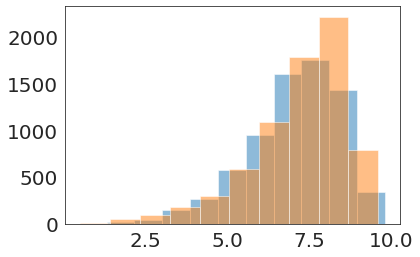

DescribeResult(nobs=7112, minmax=(1.3, 9.8), mean=7.022947131608549, variance=1.9310582236143279, skewness=-0.7551860164238581, kurtosis=0.4191379694956301)
DescribeResult(nobs=7112, minmax=(0.5, 9.6), mean=7.176377952755906, variance=2.0865689067730266, skewness=-1.2261270899190055, kurtosis=1.6332547259865002)


In [14]:
pts = 1000
a = data_new['Rev_Critic_Score']
b = data_new['User_Score']
x = np.concatenate((a, b))
k2, p = stats.normaltest(x)
alpha = 1e-3
print("p = {:g}".format(p))
p = 3.27207e-11
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

plt.hist(data_new['Rev_Critic_Score'], alpha = .5)
plt.hist(data_new['User_Score'], alpha = .5)
plt.show()

print(stats.describe(data_new['Rev_Critic_Score']))
print(stats.describe(data_new['User_Score']))

Because data isn't normally distributed I will run a kruskall Wallis test

In [15]:
stats.kruskal(data_new['Rev_Critic_Score'], data_new['User_Score'])

KruskalResult(statistic=73.99952869567855, pvalue=7.81356824938249e-18)

Because the P-Value < .05 we can say both variables have different distributions and reject the null. This makes sense as user opinions are not necessarily going to agree with critic opinions on video games.

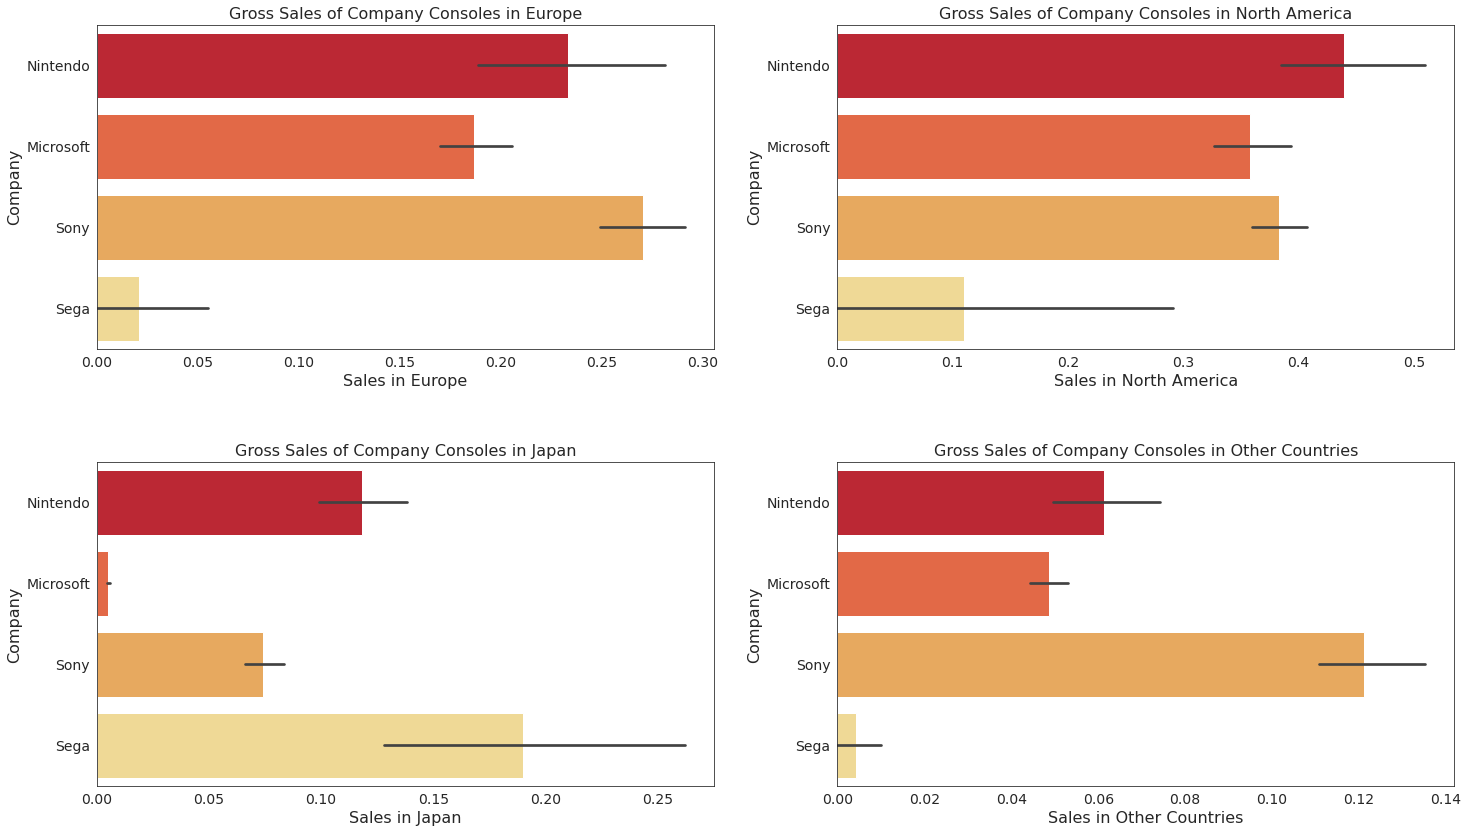

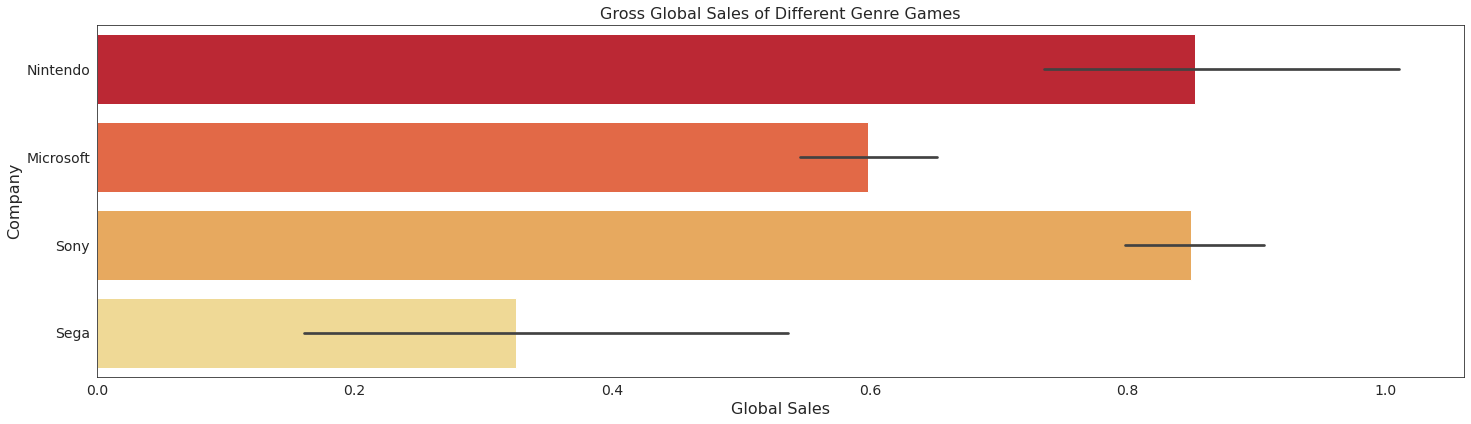

In [16]:
fig=plt.figure(figsize=(29,14))
plt.subplots_adjust(left=0.25, wspace=0.20, hspace=0.35)
sns.set_style("white")

plt.subplot(2, 2, 1)
plt.title('Gross Sales of Company Consoles in Europe',fontdict={'fontsize':16})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.barplot(y=data_new['Company'], x=data_new['EU_Sales'], data=data_new.groupby('Genre').sum().EU_Sales.sort_values(ascending=False).reset_index(),palette='YlOrRd_r');
plt.ylabel('Company',fontdict={'fontsize':16})
plt.xlabel('Sales in Europe',fontdict={'fontsize':16})

plt.subplot(2, 2, 2)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Gross Sales of Company Consoles in North America',fontdict={'fontsize':16})
sns.barplot(y=data_new['Company'], x=data_new['NA_Sales'], data=data_new.groupby('Genre').sum().NA_Sales.sort_values(ascending=False).reset_index(),palette='YlOrRd_r');
plt.ylabel('Company',fontdict={'fontsize':16})
plt.xlabel('Sales in North America',fontdict={'fontsize':16})

plt.subplot(2, 2, 3)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Gross Sales of Company Consoles in Japan',fontdict={'fontsize':16})
sns.barplot(y=data_new['Company'], x=data_new['JP_Sales'], data=data_new.groupby('Genre').sum().JP_Sales.sort_values(ascending=False).reset_index(),palette='YlOrRd_r');
plt.ylabel('Company',fontdict={'fontsize':16})
plt.xlabel('Sales in Japan',fontdict={'fontsize':16})


plt.subplot(2, 2, 4)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Gross Sales of Company Consoles in Other Countries',fontdict={'fontsize':16})
sns.barplot(y=data_new['Company'], x=data_new['Other_Sales'], data=data_new.groupby('Genre').sum().Other_Sales.sort_values(ascending=False).reset_index(),palette='YlOrRd_r');
plt.ylabel('Company',fontdict={'fontsize':16})
plt.xlabel('Sales in Other Countries',fontdict={'fontsize':16})

fig=plt.figure(figsize=(24.5,22))
plt.subplot2grid((3,1), (1,0))
sns.set_style("white")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Gross Global Sales of Different Genre Games',fontdict={'fontsize':16})
sns.barplot(y=data_new['Company'], x=data_new['Global_Sales'], data=data_new.groupby('Genre').sum().Global_Sales.sort_values(ascending=False).reset_index(),palette='YlOrRd_r');
plt.ylabel('Company',fontdict={'fontsize':16})
plt.xlabel('Global Sales',fontdict={'fontsize':16});

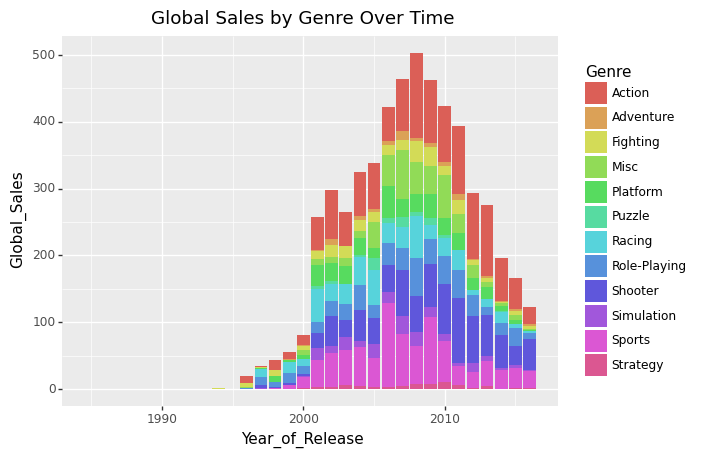

<ggplot: (8730319207017)>


In [17]:
#plot sales versus year to see any bias
global_sales_genre = ggplot(data_new, aes(x = 'Year_of_Release', y = 'Global_Sales', fill = 'Genre')) + \
    geom_bar(stat='identity')
print(global_sales_genre + ggtitle("Global Sales by Genre Over Time"))
#there appears to be a bias towards sales after 1996

Here I am trying to observe global sales by year and filter it by Genre to see a trend. We can see here there is a lack of data prior to 1996 and spikes in sales in 2001 and 2006 while a steep drop in 2012.

In [18]:
# make variable total sales
Total_Sales = sum(data_new['Global_Sales'])

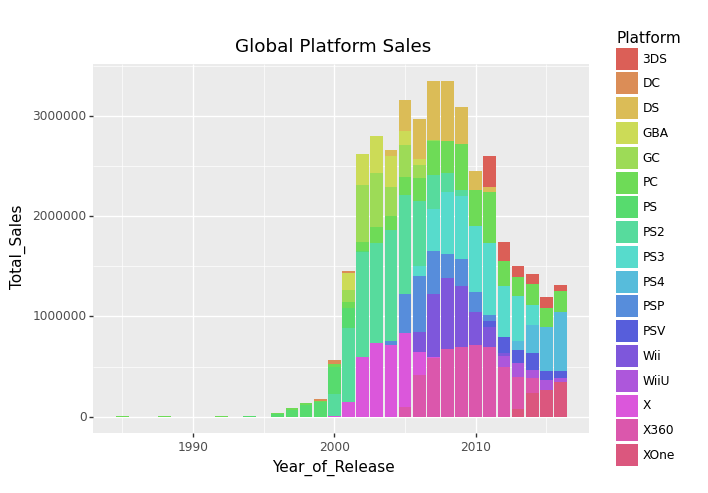

<ggplot: (8730323110725)>


In [19]:
#compare sales to platforms
platform_sales = ggplot(data_new, aes(x = 'Year_of_Release', y = 'Total_Sales', fill = 'Platform')) + \
    geom_bar(stat='identity')
print(platform_sales + ggtitle("Global Platform Sales"))
#seems after PS2 was released sony has dominated the market in general

Here I am trying to look at platform sales by year to understand the global sales spikes and drops from the previous graph. It appears the sales spike in 2001 was caused by the release of the PS2 and the spike from 2006 to 2008 coinsides with the release of the Nintendo Wii. The drop in sales from 2012 cannot be understood from this graph but the releases of the PS4 and Xbox one did not increase sales. Now we need to look at global sales for statistical significance from platforms with PS2 in 2001 and Wii for 2006.

In [20]:
# make new df to look at sales and PS2 % of them
PS2_2001 = data_new.query('Year_of_Release == "2001"')
#calculate % of global sales is PS2
PS2_2001['Percentage'] = PS2_2001['Global_Sales'] / PS2_2001['Global_Sales'].sum() 
print(PS2_2001.groupby('Platform')['Percentage'].sum().reset_index())

  Platform  Percentage
0       DC    0.002059
1      GBA    0.142474
2       GC    0.103049
3       PC    0.020975
4       PS    0.075393
5      PS2    0.573432
6        X    0.082618


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


With 57% of sales from 2001 it appears the release of the PS2 is the likely cause for the spike in sales during that year. The next closest is the GBA which was at 14% and also released that year. Let look at the 2006 spike to see how the Wii affected sales

In [21]:
# make new df to look at sales and Wii % of them
Wii_2006 = data_new.query('Year_of_Release == "2006"')
#calculate % of global sales is Wii
Wii_2006['Percentage'] = Wii_2006['Global_Sales'] / Wii_2006['Global_Sales'].sum() 
print(Wii_2006.groupby('Platform')['Percentage'].sum().reset_index())

  Platform  Percentage
0       DS    0.172338
1      GBA    0.006118
2       GC    0.021246
3       PC    0.006355
4      PS2    0.180708
5      PS3    0.047661
6      PSP    0.104806
7      Wii    0.327105
8        X    0.017167
9     X360    0.116496


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Here in terms of sales I can say that because Wii was over 32% of the global platform sales that year and the next closest is Nintendo DS at 17% that the Wii release is likely the cause of the spike. Now that we understand the relationships with the spikes lets look at how genres sales are related.

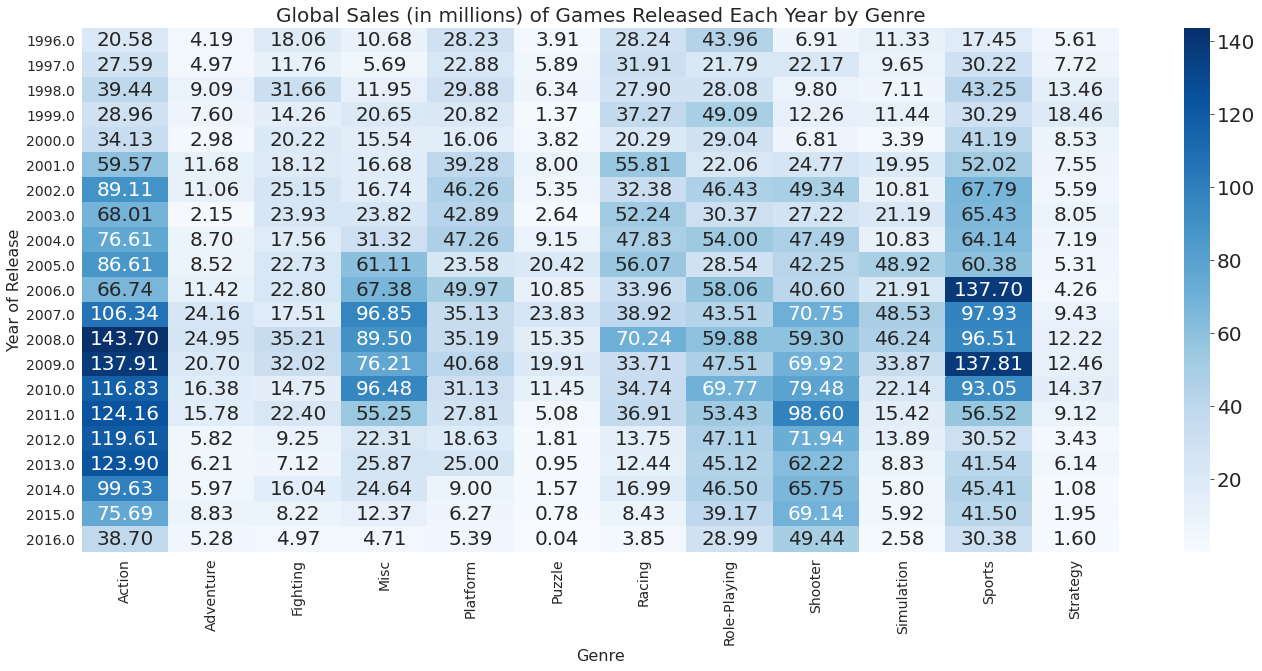

In [22]:
#Goal: Create Heatmap to look at sales patterns by Genre

#new df for calculations
genre_yr = data
# get rid of null values
genre_yr = genre_yr[genre_yr.Year_of_Release.notnull()]
genre_yr = genre_yr.loc[genre_yr.Year_of_Release < 2017]
# Pulling only the data from 1996 to 2016
# There is a large outlier spike in 1995 
genre_yr = genre_yr.loc[genre_yr.Year_of_Release >= 1996]


# Creating a table of the total global sales for each genre and year with pivot
Sales_Gen_Yr = pd.pivot_table(genre_yr,index=['Year_of_Release'],
                     columns=['Genre'],values=['Global_Sales'],aggfunc=np.sum)
Sales_Gen_Yr.columns = Sales_Gen_Yr.columns.get_level_values(1)

# Plotting the heat map of global sales for games released each year by genre
plt.figure(figsize=(20,10))
sns.heatmap(Sales_Gen_Yr,annot = True, fmt = '.2f', cmap = 'Blues')
plt.tight_layout()
plt.ylabel('Year of Release',fontdict={'fontsize':16})
plt.xlabel('Genre', fontdict={'fontsize':16})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Global Sales (in millions) of Games Released Each Year by Genre', fontdict={'fontsize':20})

plt.show()

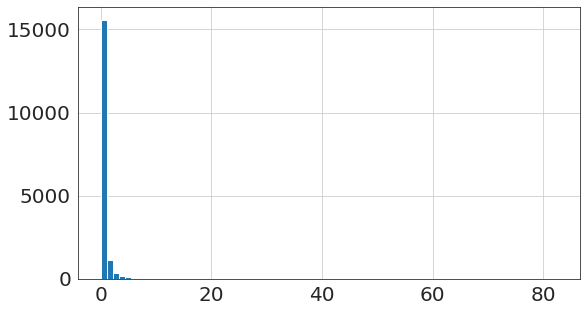

In [23]:
# Check for distribution with a Histogram of global sale
plt.figure(figsize=(9,5))
data.Global_Sales.hist(bins=75)
plt.show()

Observing sales by years with the heatmap and histogram the choice of how to represent the yearly global sales for each genre becomes interesting. The total games released each year and total global sales for each genre varies and are not consistent measurements over time. The histogram of the global sales also shows that the data is skewed. The skew indicates the yearly average of the global sales for each genre will not be a good measure to use. Therefore, I suggest using the median for the number of games sold per genre each year. since there is hardly any sales data prior to 1996 I will exclude data prior to it. Since genres are categorical and non-continuous and I am comparing them to sales which are continous and numerical linear regression makes the most sense.

In [24]:
# Calculate the median sales value by genre and year. Need to make year of release the index and genres the columns.
Med_Sales_Gen_Yr = pd.pivot_table(genre_yr,index=['Year_of_Release'],
                     columns=['Genre'],values=['Global_Sales'],aggfunc=np.median)
Med_Sales_Gen_Yr.columns = Med_Sales_Gen_Yr.columns.get_level_values(1)

Med_Sales_Gen_Yr.head()

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year_of_Release,,,,,,,,,,,,
1996.0,0.245,0.150,0.180,0.180,0.340,0.150,0.765,0.260,0.190,0.270,0.210,0.195
1997.0,0.240,0.140,0.250,0.235,0.360,0.260,0.290,0.400,0.130,0.320,0.490,0.235
1998.0,0.250,0.115,0.250,0.310,0.470,0.220,0.310,0.275,0.120,0.825,0.450,0.090
1999.0,0.400,0.140,0.155,0.400,0.465,0.040,0.300,0.450,0.300,0.325,0.315,0.200
2000.0,0.300,0.120,0.240,0.350,0.280,0.265,0.230,0.350,0.205,0.115,0.270,0.185


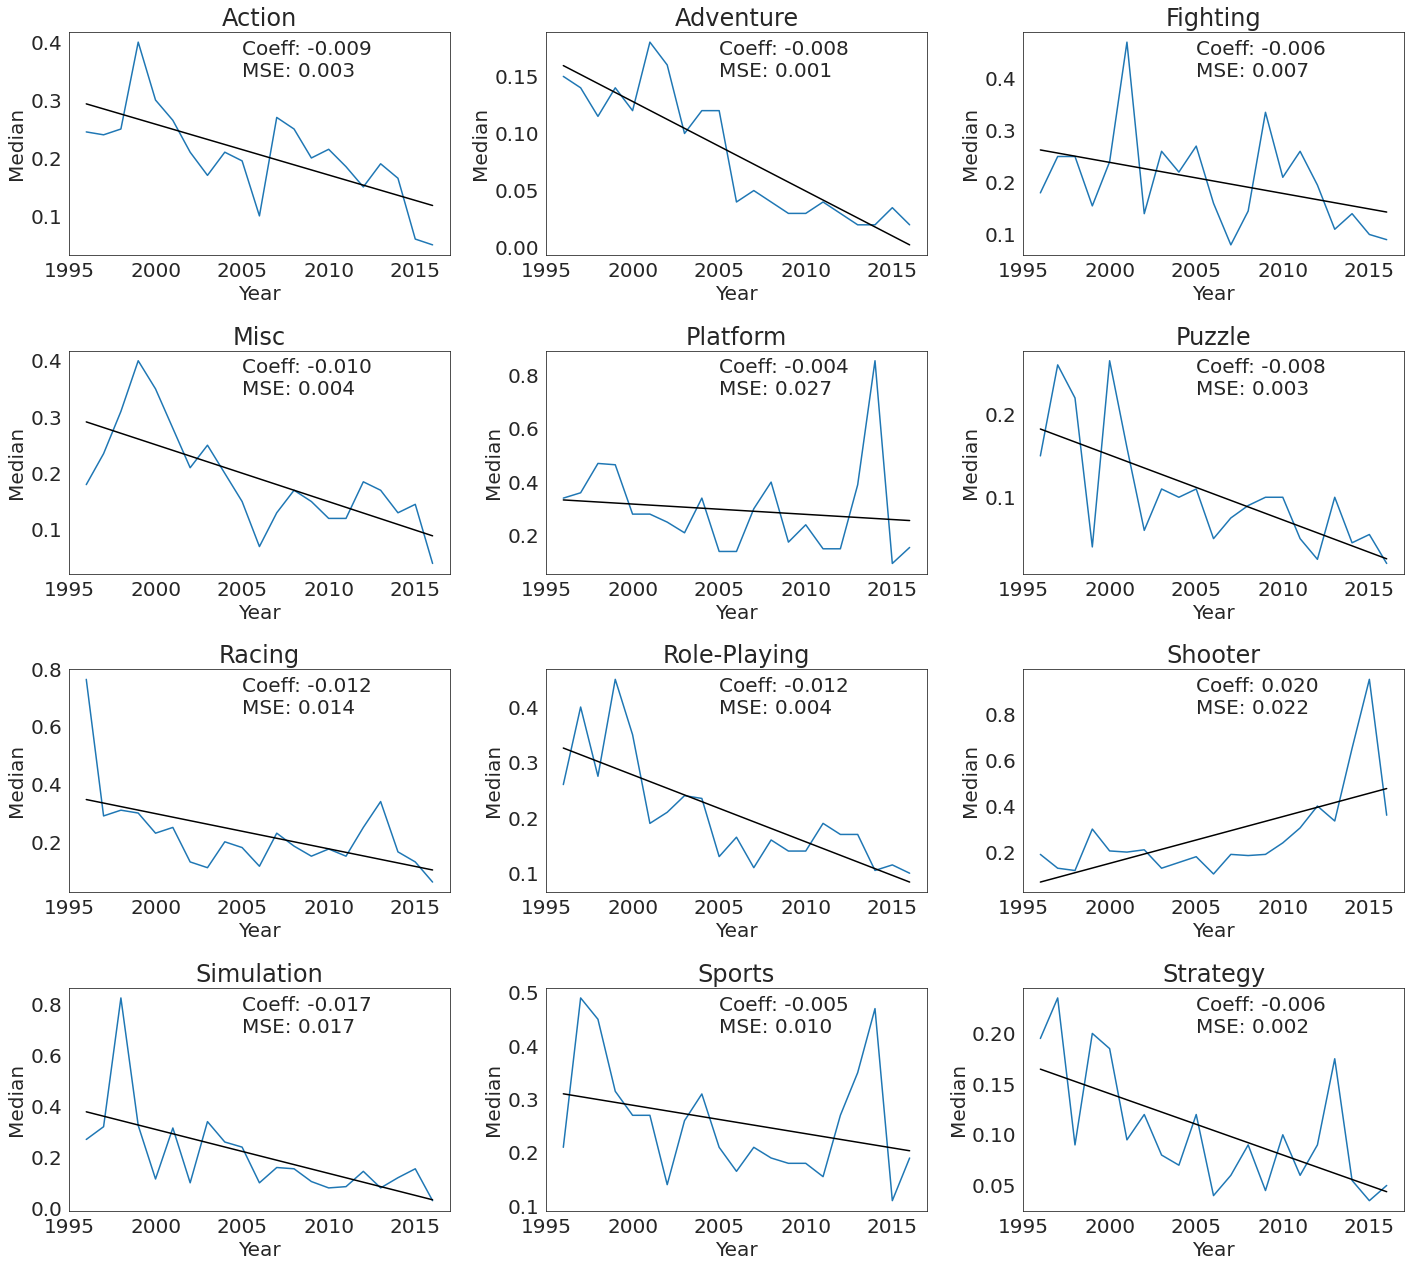

In [25]:
def Linear_Regression_Plot(genre_yr):
    Regr_Coeff = []
    Regr_MSE = []
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20,18))

    x_data = np.transpose(np.matrix(genre_yr.index))

    count = 0
    
    for genre in genre_yr.columns:
        axs = axes[count//3,count%3]
        y_data = genre_yr[genre].to_frame()
    
        # Linear regression
        regr = linear_model.LinearRegression()
        regr.fit(x_data,y_data)
        
        # Mean Squared Error
        MSE = np.mean((regr.predict(x_data)-y_data)**2)
        
        Regr_Coeff.append(regr.coef_[0][0])
        Regr_MSE.append(MSE[0])

        genre_yr[genre].plot(ax=axs)
        axs.plot(x_data,regr.predict(x_data), color='black')

        y_lims = axs.get_ylim()
        
        
        txt = 'Coeff: %.3f \nMSE: %.3f' % (regr.coef_,MSE)
        y_loc = 0.80*(y_lims[1]-y_lims[0])+y_lims[0]
        axs.text(2005,y_loc,txt)

        axs.set_title(genre)
        axs.set_xlabel('Year')
        axs.set_ylabel('Median')
        count+=1
    fig.tight_layout()
    
    return [Regr_Coeff,Regr_MSE]
    
[Regr_Coeff,Regr_MSE] = Linear_Regression_Plot(Med_Sales_Gen_Yr)

Here all but Shooter games have a negative trend. By removing data before 1996 I displays sale years that are more relevent to today. Also, despite removing data prior to 1996 my dataset will still include > 90% of the total global sales. Lets compare the negative trends with global sales

Text(0, 0.5, 'Median Sales (in millions)')

<Figure size 5760x2880 with 0 Axes>

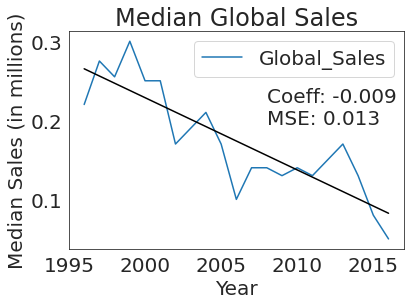

In [26]:
Med_Sales_by_Yr = pd.pivot_table(genre_yr,index=['Year_of_Release'],
                     values=['Global_Sales'],aggfunc=np.median)


plt.figure(figsize=(80,40))
Med_Sales_by_Yr.plot()

x_data = np.transpose(np.matrix(Med_Sales_by_Yr.index))
y_data = Med_Sales_by_Yr
regr = linear_model.LinearRegression()
regr.fit(x_data,y_data)

plt.plot(x_data,regr.predict(x_data), color='black')

txt = 'Coeff: %.3f \nMSE: %.3f' % (regr.coef_,np.mean((regr.predict(x_data[0])-y_data)**2))

plt.text(2008,0.65*Med_Sales_by_Yr.max(),txt)

plt.title('Median Global Sales')
plt.xlabel('Year')
plt.ylabel('Median Sales (in millions)')

Due to an overall negative trend in global sales which is shared with all but shooter genres all video game sales are declining. This could be due to the mobile app game market. Although I have no data in this dataset to compare with the mobile app game market I think it is easy to understand the difficulty of playing a shooter game on a mobile device. First and third person shooter games are not easy with touchscreen controls which is why we do not see shooter game sales with a negative trend like other genres. However, more data needs to be analyzed to confirm this with data from mobile app game sales.

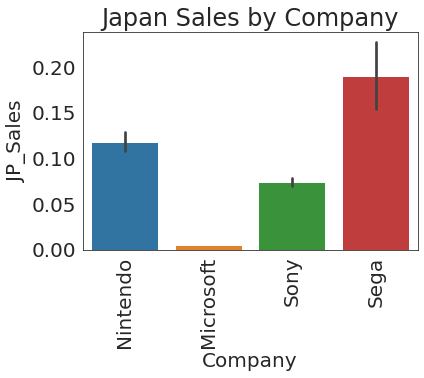

In [27]:
jpdf = data_new
jpdf = jpdf.dropna()
g = sns.barplot( x = 'Company', y = 'JP_Sales',  data = jpdf, ci = 68)
g.set_title('Japan Sales by Company')
plt.setp(g.get_xticklabels(), rotation=90)
plt.show()

In [28]:
#make new df
jpdf = data_new
jpdf = jpdf.dropna()
print(jpdf.head())
#show % sales are role-playing
jpdf['Percentage'] = jpdf['JP_Sales'] / jpdf['JP_Sales'].sum()
print(jpdf.groupby('Genre')['Percentage'].sum().reset_index())

                    Name Platform  Year_of_Release     Genre Publisher  \
0             Wii Sports      Wii           2006.0    Sports  Nintendo   
2         Mario Kart Wii      Wii           2008.0    Racing  Nintendo   
3      Wii Sports Resort      Wii           2009.0    Sports  Nintendo   
6  New Super Mario Bros.       DS           2006.0  Platform  Nintendo   
7               Wii Play      Wii           2006.0      Misc  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.54          76.0   
2     15.68     12.80      3.79         3.29         35.57          82.0   
3     15.61     10.95      3.28         2.95         32.78          80.0   
6     11.28      9.15      6.50         2.88         29.81          89.0   
7     13.96      9.18      2.93         2.84         28.92          58.0   

   Critic_Count  User_Score  User_Count Rating   Company  Rev_Critic_Score  
0          51.0      

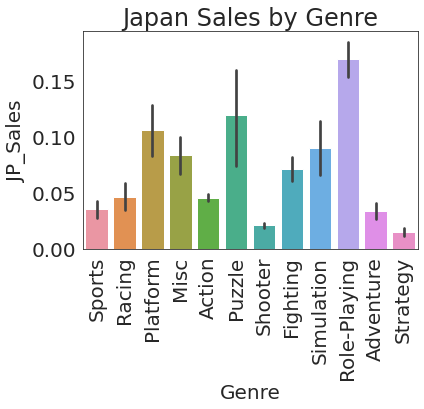

In [29]:
jpdf = data_new
jpdf = jpdf.dropna()
g = sns.barplot( x = "Genre", y = 'JP_Sales',  data = jpdf, ci = 68)
g.set_title('Japan Sales by Genre')
plt.setp(g.get_xticklabels(), rotation=90)
plt.show()

In Japan Microsoft severly lacks market sales and can increase their profits siginificantly here by trying to capitalize on games that sell in the japan market. When filtering the data by genre it appears for Japan sales are significantly higher for Role-play games. Lets filter it by company to show who is making the most money in Japan for each genre.

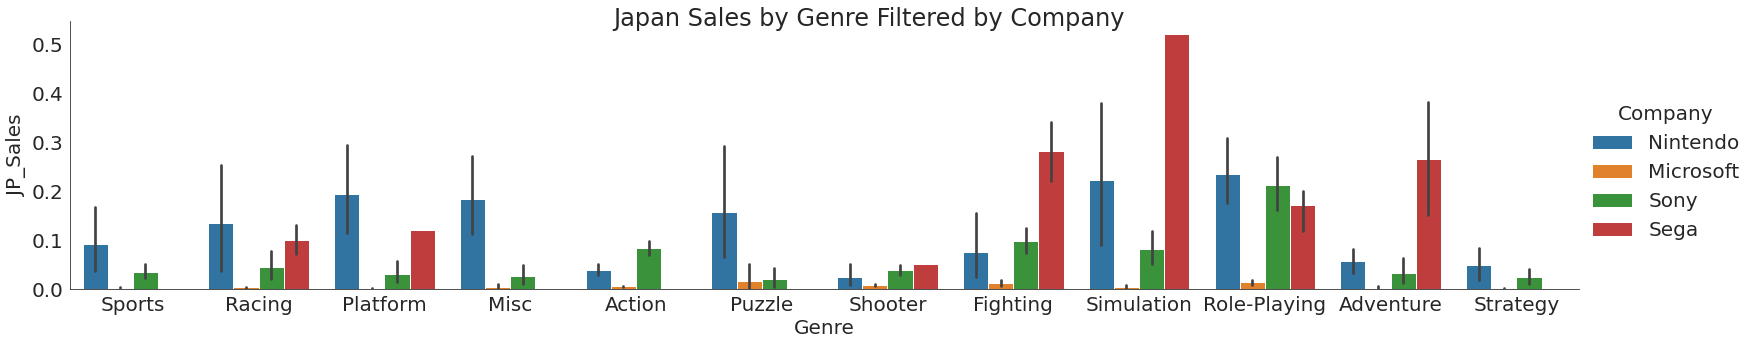

In [30]:
#make barplot of JP_Sales and Company filtering by genre
g = sns.catplot(x = 'Genre', y = 'JP_Sales', kind = 'bar', hue = 'Company', height=5, 
                aspect = 4.5, data = jpdf).fig.suptitle('Japan Sales by Genre Filtered by Company')
plt.show()

This chart is interesting. It shows that when you filter japan sales by genre with companies that sega has the most sales in adventure, simulation, and fighting games compared to their competitors. When looking at Role-Playing specifically we can see Sega, Sony, and Nintendo have significantly more sales than microsoft. The next highest genre sales are puzzle, platform, and simulation which nintendo has the overall edge on everyone except simulation where they are second to Sega. Sony in particular doesn't have dominance over any particular genre but is second in most of them. Microsoft is last in all categories and is barely even noticeable in most. I think the reason Nintendo is highest here is that they are creating more sales in certain genre markets their competitors are not(ex. sports, platform, misc, puzzle, racing). I believe the reason for this is that they are focusing on marketing more towards role-playing and action games and not other genres like Nintendo.  

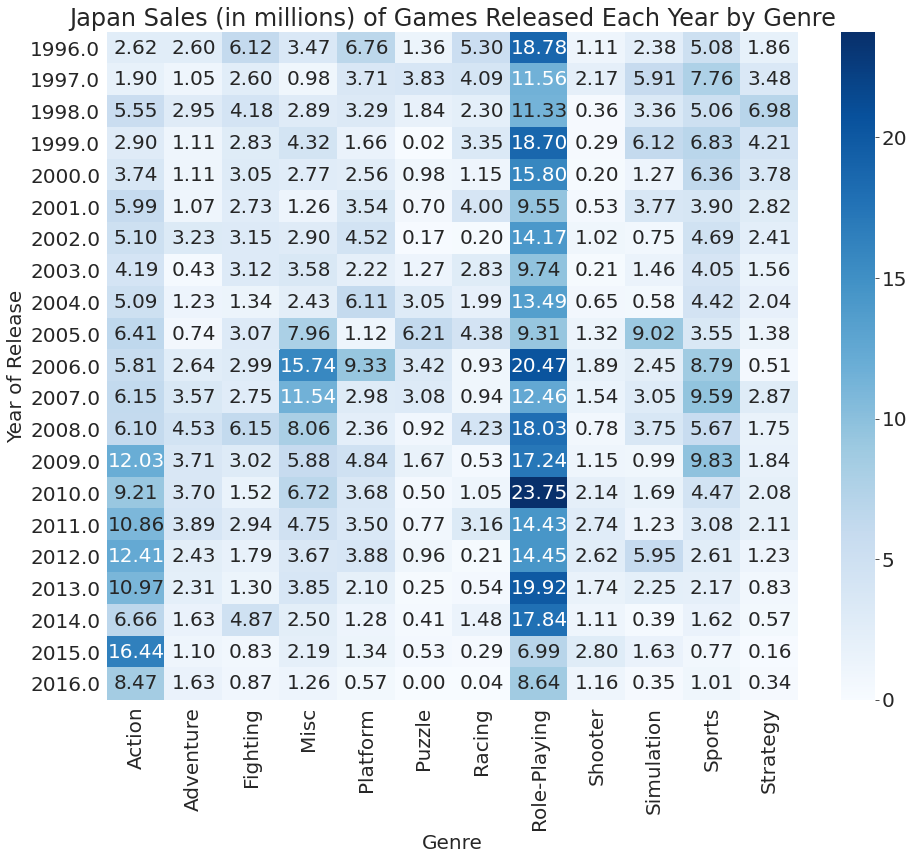

In [31]:
#new df for calculations
genre_yr_JP = data
# get rid of null values
genre_yer_JP = genre_yr_JP.dropna()
#genre_yr_JP = genre_yr_JP[genre_yr_JP.Year_of_Release.notnull()]
genre_yr_JP = genre_yr_JP.loc[genre_yr_JP.Year_of_Release < 2017]
# Pulling only the data from 1996 to 2016
# There is a large outlier spike in 1995 
genre_yr_JP = genre_yr_JP.loc[genre_yr_JP.Year_of_Release >= 1996]


# Creating a table of the total global sales for each genre and year with pivot
Sales_Gen_Yr_JP = pd.pivot_table(genre_yr_JP,index=['Year_of_Release'],
                     columns=['Genre'],values=['JP_Sales'],aggfunc=np.sum)
Sales_Gen_Yr_JP.columns = Sales_Gen_Yr_JP.columns.get_level_values(1)

# Plotting the heat map of global sales for games released each year by genre
plt.figure(figsize=(14,12))
sns.heatmap(Sales_Gen_Yr_JP,annot = True, fmt = '.2f', cmap = 'Blues')
plt.tight_layout()
plt.ylabel('Year of Release')
plt.xlabel('Genre')
plt.title('Japan Sales (in millions) of Games Released Each Year by Genre')
plt.show()

In [32]:
Med_Sales_Gen_Yr_JP = pd.pivot_table(genre_yr_JP,index=['Year_of_Release'],
                     columns=['Genre'],values=['JP_Sales'],aggfunc=np.median)
Med_Sales_Gen_Yr_JP.columns = Med_Sales_Gen_Yr_JP.columns.get_level_values(1)

Med_Sales_Gen_Yr_JP.head()


Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year_of_Release,,,,,,,,,,,,
1996.0,0.0,0.040,0.125,0.070,0.12,0.09,0.0,0.215,0.0,0.00,0.0,0.065
1997.0,0.0,0.070,0.045,0.045,0.04,0.14,0.0,0.290,0.0,0.16,0.0,0.130
1998.0,0.0,0.085,0.030,0.000,0.00,0.00,0.0,0.100,0.0,0.32,0.0,0.030
1999.0,0.0,0.000,0.000,0.000,0.00,0.00,0.0,0.250,0.0,0.25,0.0,0.000
2000.0,0.0,0.060,0.060,0.000,0.00,0.00,0.0,0.200,0.0,0.00,0.0,0.030


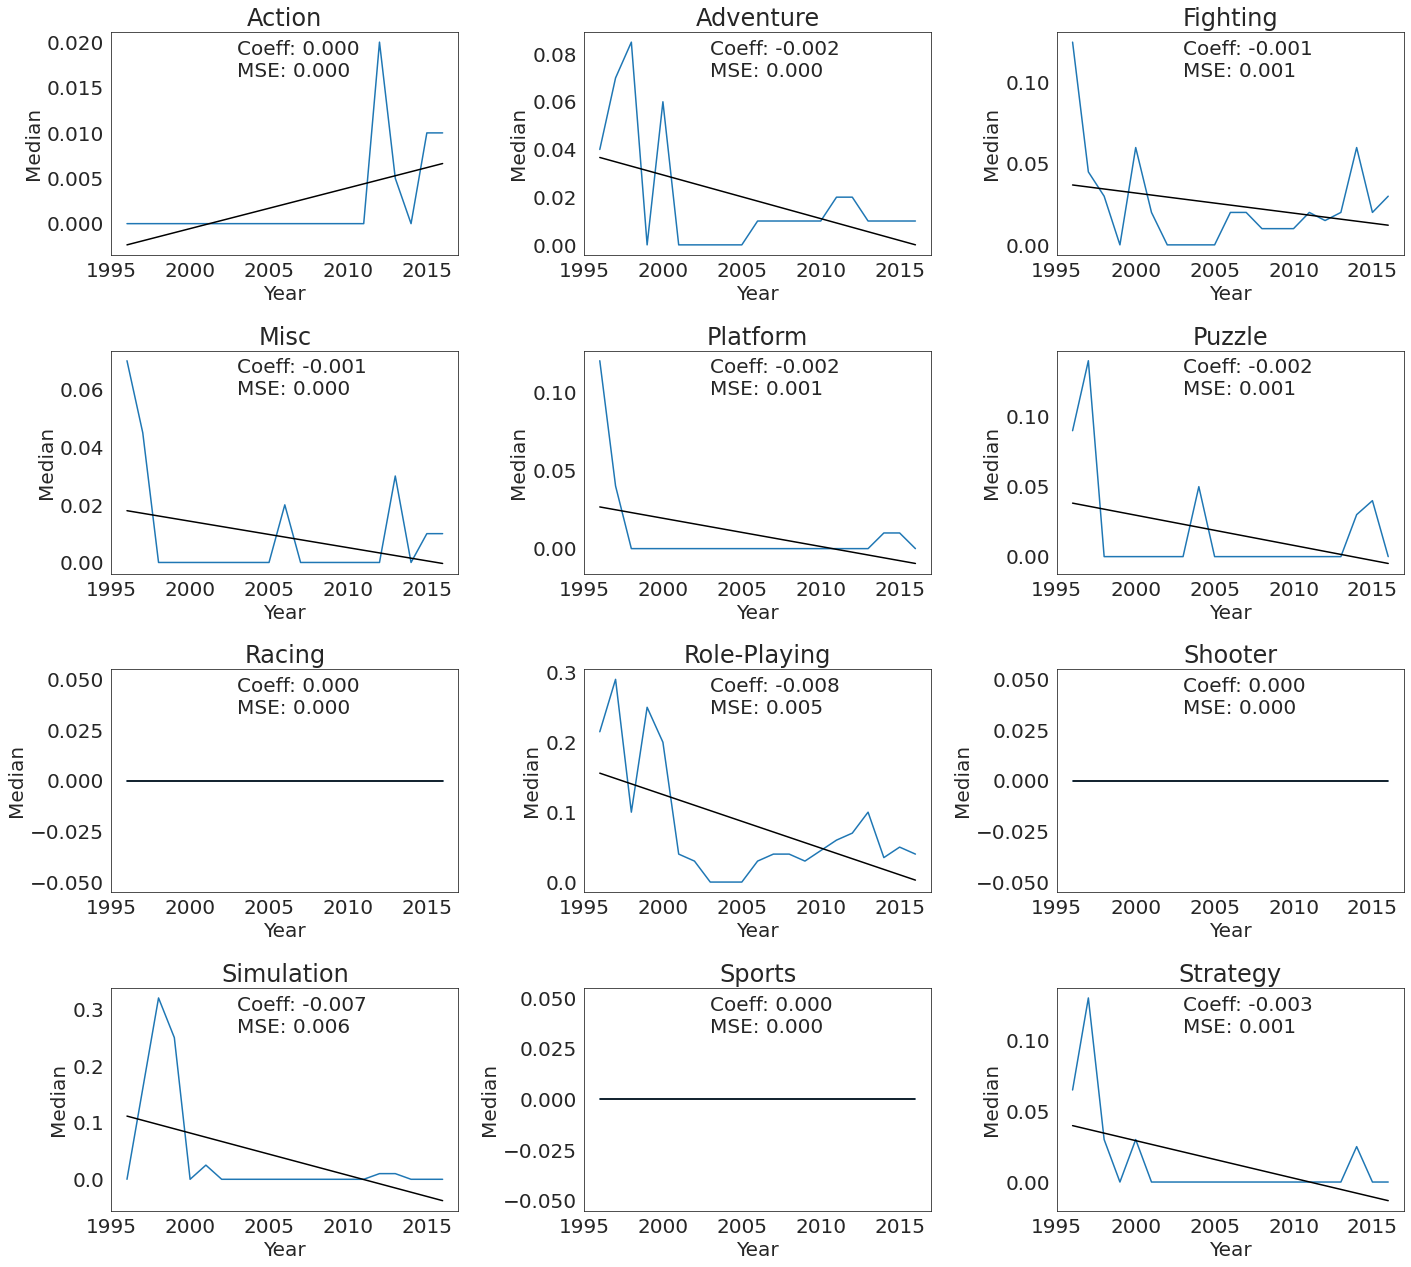

In [33]:
def Linear_Regression_Plot(genre_yr_JP):
    Regr_Coeff = []
    Regr_MSE = []
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20,18))

    x_data = np.transpose(np.matrix(genre_yr_JP.index))

    count = 0
    
    for genre in genre_yr_JP.columns:
        axs = axes[count//3,count%3]
        y_data = genre_yr_JP[genre].to_frame()
    
        # Linear regression
        regr = linear_model.LinearRegression()
        regr.fit(x_data,y_data)
        
        # Mean Squared Error
        MSE = np.mean((regr.predict(x_data)-y_data)**2)
        
        Regr_Coeff.append(regr.coef_[0][0])
        Regr_MSE.append(MSE[0])

        genre_yr_JP[genre].plot(ax=axs)
        axs.plot(x_data,regr.predict(x_data), color='black')

        y_lims = axs.get_ylim()
        
        
        txt = 'Coeff: %.3f \nMSE: %.3f' % (regr.coef_,MSE)
        y_loc = 0.80*(y_lims[1]-y_lims[0])+y_lims[0]
        axs.text(2003,y_loc,txt)

        axs.set_title(genre)
        axs.set_xlabel('Year')
        axs.set_ylabel('Median')
        count+=1
    fig.tight_layout()
    
    return [Regr_Coeff,Regr_MSE]
    
[Regr_Coeff,Regr_MSE] = Linear_Regression_Plot(Med_Sales_Gen_Yr_JP)

The regression charts here show a different trend from the global one shown previously. In general there appears to be a lack of data for Japan. Certain years appear to have no sales present or lack data at all for certain genres in the regressions charts(sports, shooter, and racing). Others have individual years where the median sales in japan by genre were zero. This shows that videogame sales in japan are declining as only action games show a positive trend. The lack of data or low sales in the Japanese market could also be an indicator of their country becoming a smaller market share in the global market.

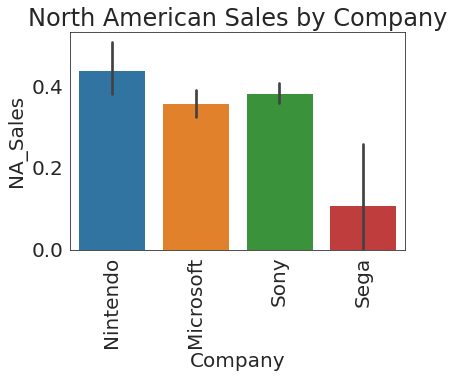

In [34]:
#make new df and drop null values
nadf = data_new
nadf = nadf.dropna()
#make barplot
g = sns.barplot(x = 'Company', y = 'NA_Sales', data = nadf)
g.set_title('North American Sales by Company')
plt.setp(g.get_xticklabels(), rotation=90)
plt.show()

Here we see higher sales from microsoft than in Japan and less sales from Sega.

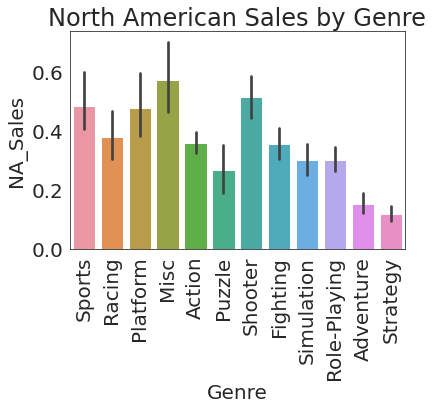

In [35]:
#make new df and drop null values
nadf = data_new
nadf = nadf.dropna()
#make sns barplot by genre
g = sns.barplot(x = 'Genre', y = 'NA_Sales', data = nadf)
g.set_title('North American Sales by Genre')
plt.setp(g.get_xticklabels(), rotation=90)
plt.show()

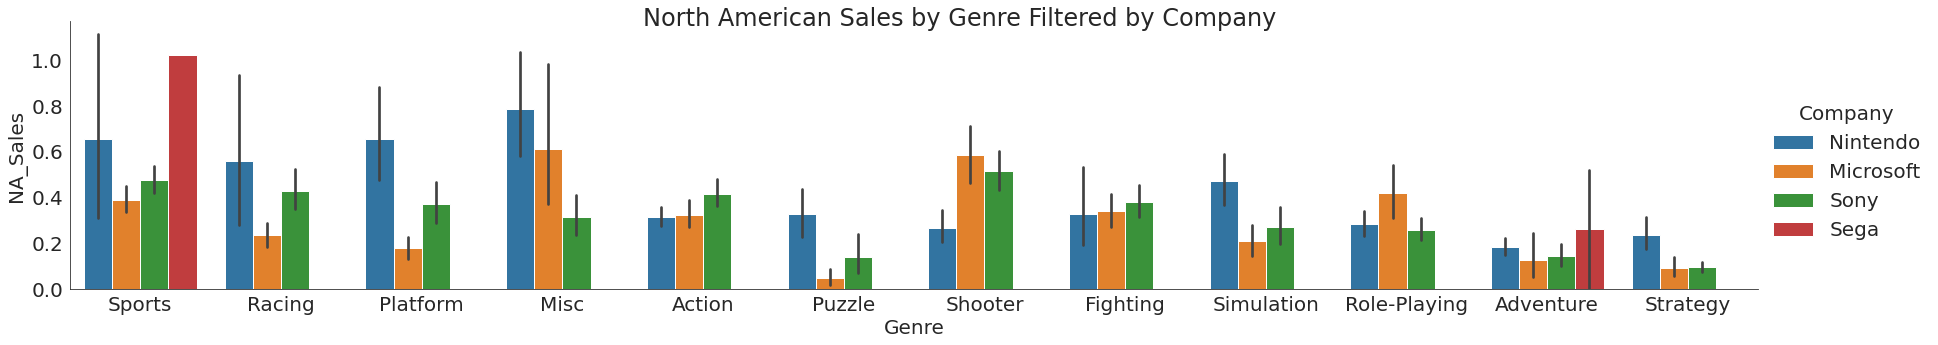

In [36]:
#make new df and drop null values
nadf = data_new
nadf = nadf.dropna()
#make sns barplot by company
g = sns.catplot(x = 'Genre', y = 'NA_Sales', kind = 'bar', hue = 'Company', height=5, aspect = 5, data = nadf).fig.suptitle('North American Sales by Genre Filtered by Company')
plt.show()

In North America most sales come from other genres (shooters, misc, sports, and platform) although role-playing games are still a significant amount. Sega has the most sales from sports but nintendo seems to dominate most genres except action, shooter, fighting, role playing, and adventure. Sony doesn't dominate any genre other than fighting but their variance appears lower than their competitors that are selling ahead of them for different genres (ex. sports, racing, platform). The lack of variance could be Sony having overall higher sales and appeal of the videogame market. Nintendo in North America like Japan is putting more emphasis in diversifying their sales into different genres that their competitors. Microsoft and Sony dominate sales in shooter games over Nintendo.

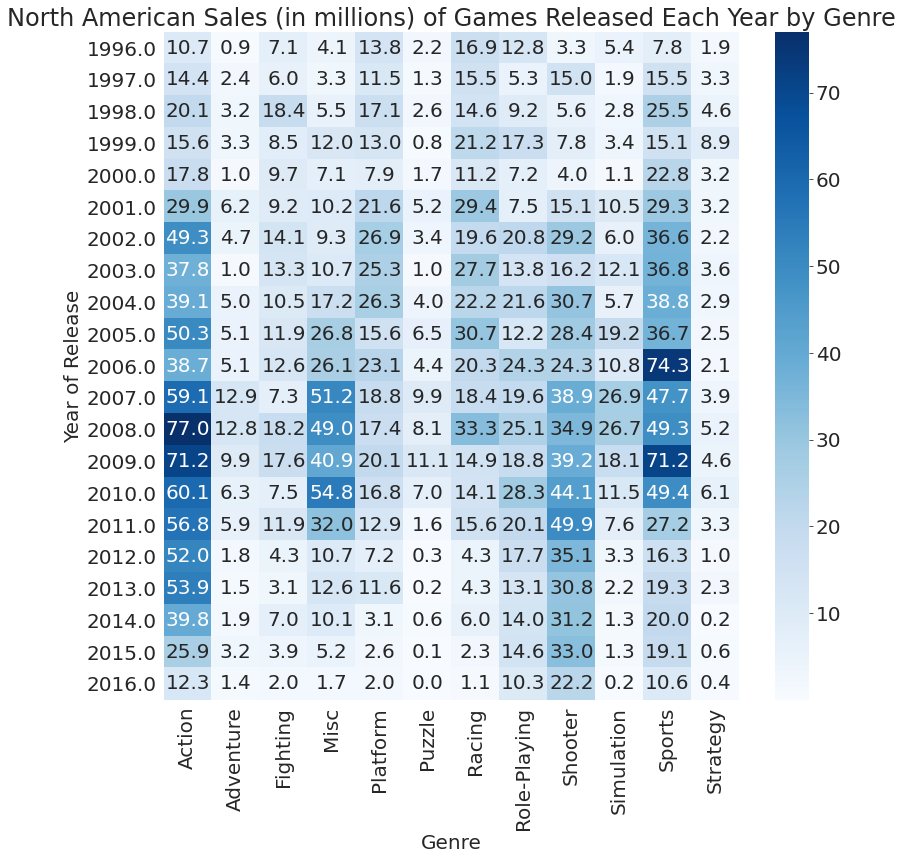

In [37]:
#new df for calculations
genre_yr_NA = data
# get rid of null values
genre_yr_NA = genre_yr_NA[genre_yr_NA.Year_of_Release.notnull()]
genre_yr_NA = genre_yr_NA.loc[genre_yr_NA.Year_of_Release < 2017]
# Pulling only the data from 1996 to 2016
# There is a large outlier spike in 1995 
genre_yr_NA = genre_yr_NA.loc[genre_yr_NA.Year_of_Release >= 1996]


# Creating a table of the total global sales for each genre and year with pivot
Sales_Gen_Yr_NA = pd.pivot_table(genre_yr_NA,index=['Year_of_Release'],
                     columns=['Genre'],values=['NA_Sales'],aggfunc=np.sum)
Sales_Gen_Yr_NA.columns = Sales_Gen_Yr_NA.columns.get_level_values(1)

# Plotting the heat map of global sales for games released each year by genre
plt.figure(figsize=(12,12))
sns.heatmap(Sales_Gen_Yr_NA,annot = True, fmt = '.1f', cmap = 'Blues')
plt.tight_layout()
plt.ylabel('Year of Release')
plt.xlabel('Genre')
plt.title('North American Sales (in millions) of Games Released Each Year by Genre')
plt.show()

In [38]:
Med_Sales_Gen_Yr_NA = pd.pivot_table(genre_yr_NA,index=['Year_of_Release'],
                     columns=['Genre'],values=['NA_Sales'],aggfunc=np.median)
Med_Sales_Gen_Yr_NA.columns = Med_Sales_Gen_Yr_NA.columns.get_level_values(1)

Med_Sales_Gen_Yr_NA.head()

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year_of_Release,,,,,,,,,,,,
1996.0,0.095,0.00,0.005,0.00,0.11,0.000,0.170,0.00,0.040,0.050,0.060,0.000
1997.0,0.115,0.00,0.100,0.05,0.15,0.025,0.135,0.04,0.050,0.050,0.150,0.000
1998.0,0.135,0.00,0.130,0.12,0.27,0.060,0.110,0.03,0.070,0.085,0.160,0.000
1999.0,0.250,0.05,0.060,0.17,0.26,0.030,0.190,0.10,0.210,0.000,0.115,0.030
2000.0,0.190,0.01,0.130,0.13,0.16,0.155,0.140,0.04,0.125,0.015,0.100,0.015


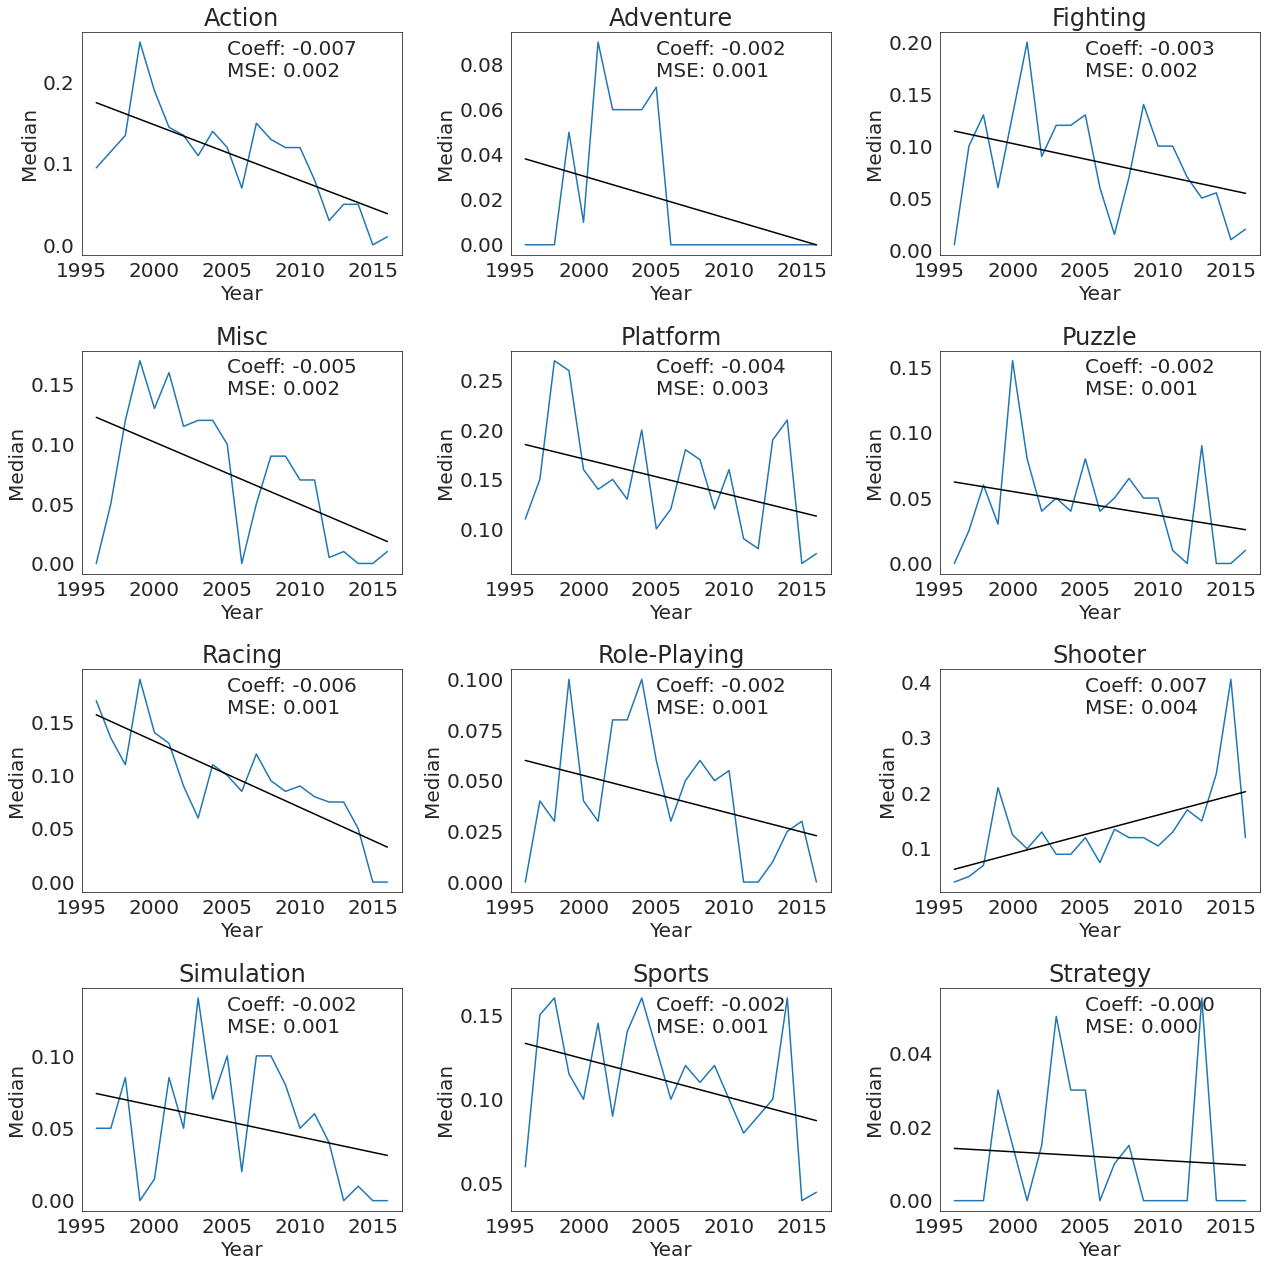

In [39]:
def Linear_Regression_Plot(genre_yr_NA):
    Regr_Coeff = []
    Regr_MSE = []
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18,18))

    x_data = np.transpose(np.matrix(genre_yr_NA.index))

    count = 0
    
    for genre in genre_yr_NA.columns:
        axs = axes[count//3,count%3]
        y_data = genre_yr_NA[genre].to_frame()
    
        # Linear regression
        regr = linear_model.LinearRegression()
        regr.fit(x_data,y_data)
        
        # Mean Squared Error
        MSE = np.mean((regr.predict(x_data)-y_data)**2)
        
        Regr_Coeff.append(regr.coef_[0][0])
        Regr_MSE.append(MSE[0])

        genre_yr_NA[genre].plot(ax=axs)
        axs.plot(x_data,regr.predict(x_data), color='black')

        y_lims = axs.get_ylim()
        
        
        txt = 'Coeff: %.3f \nMSE: %.3f' % (regr.coef_,MSE)
        y_loc = 0.8*(y_lims[1]-y_lims[0])+y_lims[0]
        axs.text(2005,y_loc,txt)

        axs.set_title(genre)
        axs.set_xlabel('Year')
        axs.set_ylabel('Median')
        count+=1
    fig.tight_layout()
    
    return [Regr_Coeff,Regr_MSE]
    
[Regr_Coeff,Regr_MSE] = Linear_Regression_Plot(Med_Sales_Gen_Yr_NA)

North American sales seem to follow a similar trend to the global sales displayed earlier. Shooter games are the only genre that doesn't have a negative trend. This could be because of the rise of the mobile game app market. Shooter games are increasing because it may be too difficult to implement them in a mobile tablet environment. Another possibility is that the global sales data could be biased in favor of North America.

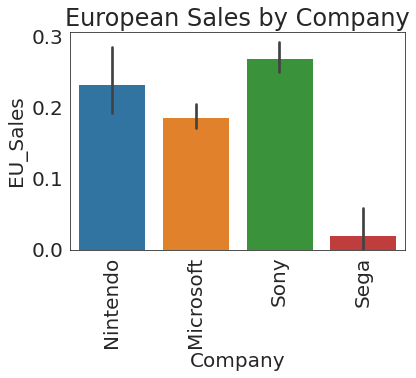

In [40]:
#make new df and drop null values
eudf = data_new
eudf = eudf.dropna()
#make barplot
g = sns.barplot(x = 'Company', y = 'EU_Sales', data = eudf)
g.set_title('European Sales by Company')
plt.setp(g.get_xticklabels(), rotation=90)
plt.show()

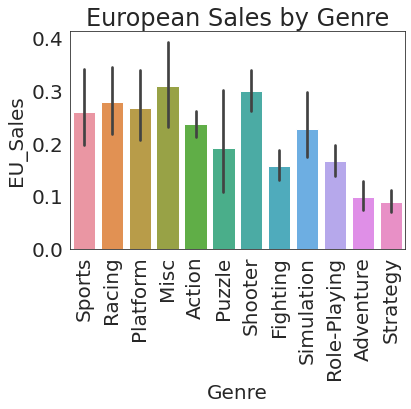

In [41]:
#make sns barplot by genre  c
g = sns.barplot(x = 'Genre', y = 'EU_Sales', data = eudf)
g.set_title('European Sales by Genre')
plt.setp(g.get_xticklabels(), rotation=90)
plt.show()

The results here are more balanced compared to Japan or North American Sales. Racing, sports, platform, misc.,shooting, and simulation all are realtively even in sales. This indicates that the european market is more diverse in sales by genre.

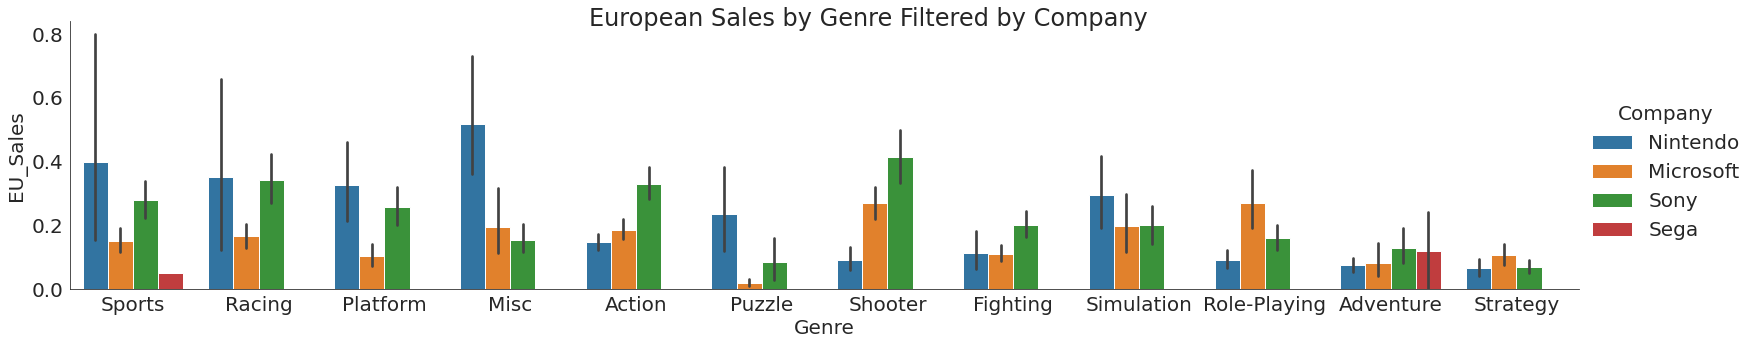

In [42]:
#make sns barplot by company
g = sns.catplot(x = 'Genre', y = 'EU_Sales', kind = 'bar', hue = 'Company', height=5, aspect = 4.5, data = eudf).fig.suptitle('European Sales by Genre Filtered by Company')
plt.show()

Similar to North America Microsoft and Sony dominant the shooter genre while Nintendo is dominate in the misc and platform games.

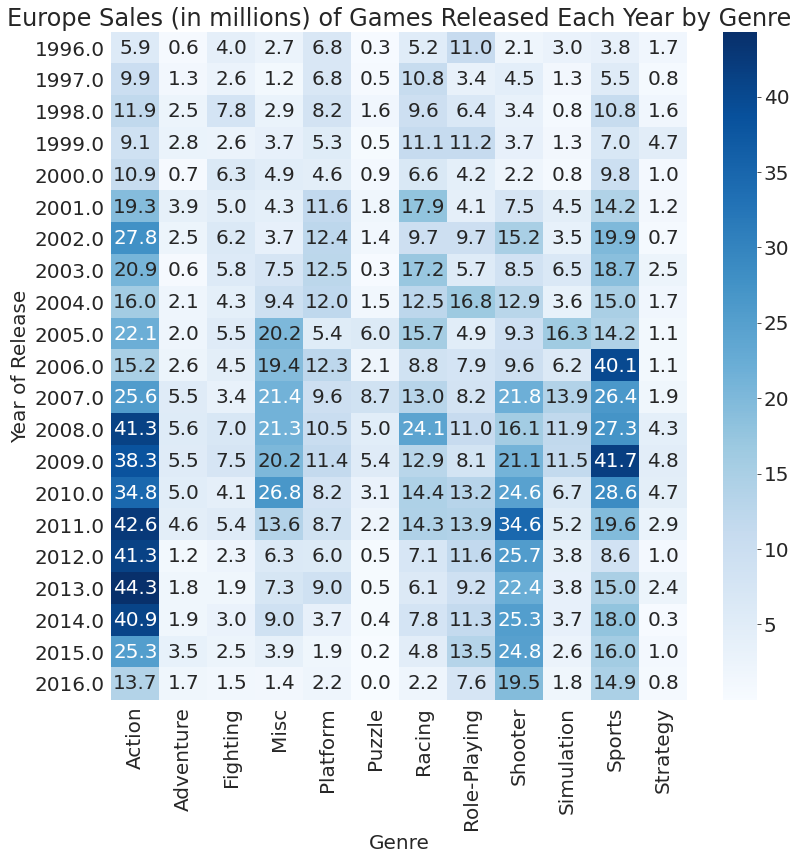

In [43]:
#new df for calculations
genre_yr_eu = data
# get rid of null values
genre_yr_eu = genre_yr_eu[genre_yr_eu.Year_of_Release.notnull()]
genre_yr_eu = genre_yr_eu.loc[genre_yr_eu.Year_of_Release < 2017]
# Pulling only the data from 1996 to 2016
# There is a large outlier spike in 1995 
genre_yr_eu = genre_yr_eu.loc[genre_yr_eu.Year_of_Release >= 1996]


# Creating a table of the total global sales for each genre and year with pivot
Sales_Gen_Yr_eu = pd.pivot_table(genre_yr_eu,index=['Year_of_Release'],
                     columns=['Genre'],values=['EU_Sales'],aggfunc=np.sum)
Sales_Gen_Yr_eu.columns = Sales_Gen_Yr_eu.columns.get_level_values(1)

# Plotting the heat map of global sales for games released each year by genre
plt.figure(figsize=(12,12))
sns.heatmap(Sales_Gen_Yr_eu,annot = True, fmt = '.1f', cmap = 'Blues')
plt.tight_layout()
plt.ylabel('Year of Release')
plt.xlabel('Genre')
plt.title('Europe Sales (in millions) of Games Released Each Year by Genre')
plt.show()

In [44]:
Med_Sales_Gen_Yr_eu = pd.pivot_table(genre_yr_eu,index=['Year_of_Release'],
                     columns=['Genre'],values=['EU_Sales'],aggfunc=np.median)
Med_Sales_Gen_Yr_eu.columns = Med_Sales_Gen_Yr_eu.columns.get_level_values(1)

Med_Sales_Gen_Yr_eu.head()

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year_of_Release,,,,,,,,,,,,
1996.0,0.060,0.000,0.005,0.000,0.070,0.000,0.08,0.000,0.030,0.040,0.040,0.00
1997.0,0.065,0.000,0.035,0.035,0.090,0.015,0.09,0.030,0.030,0.030,0.050,0.00
1998.0,0.055,0.000,0.080,0.080,0.120,0.030,0.06,0.025,0.030,0.045,0.040,0.01
1999.0,0.085,0.010,0.040,0.050,0.135,0.020,0.06,0.050,0.060,0.000,0.025,0.01
2000.0,0.090,0.005,0.050,0.060,0.060,0.075,0.07,0.030,0.065,0.025,0.060,0.01


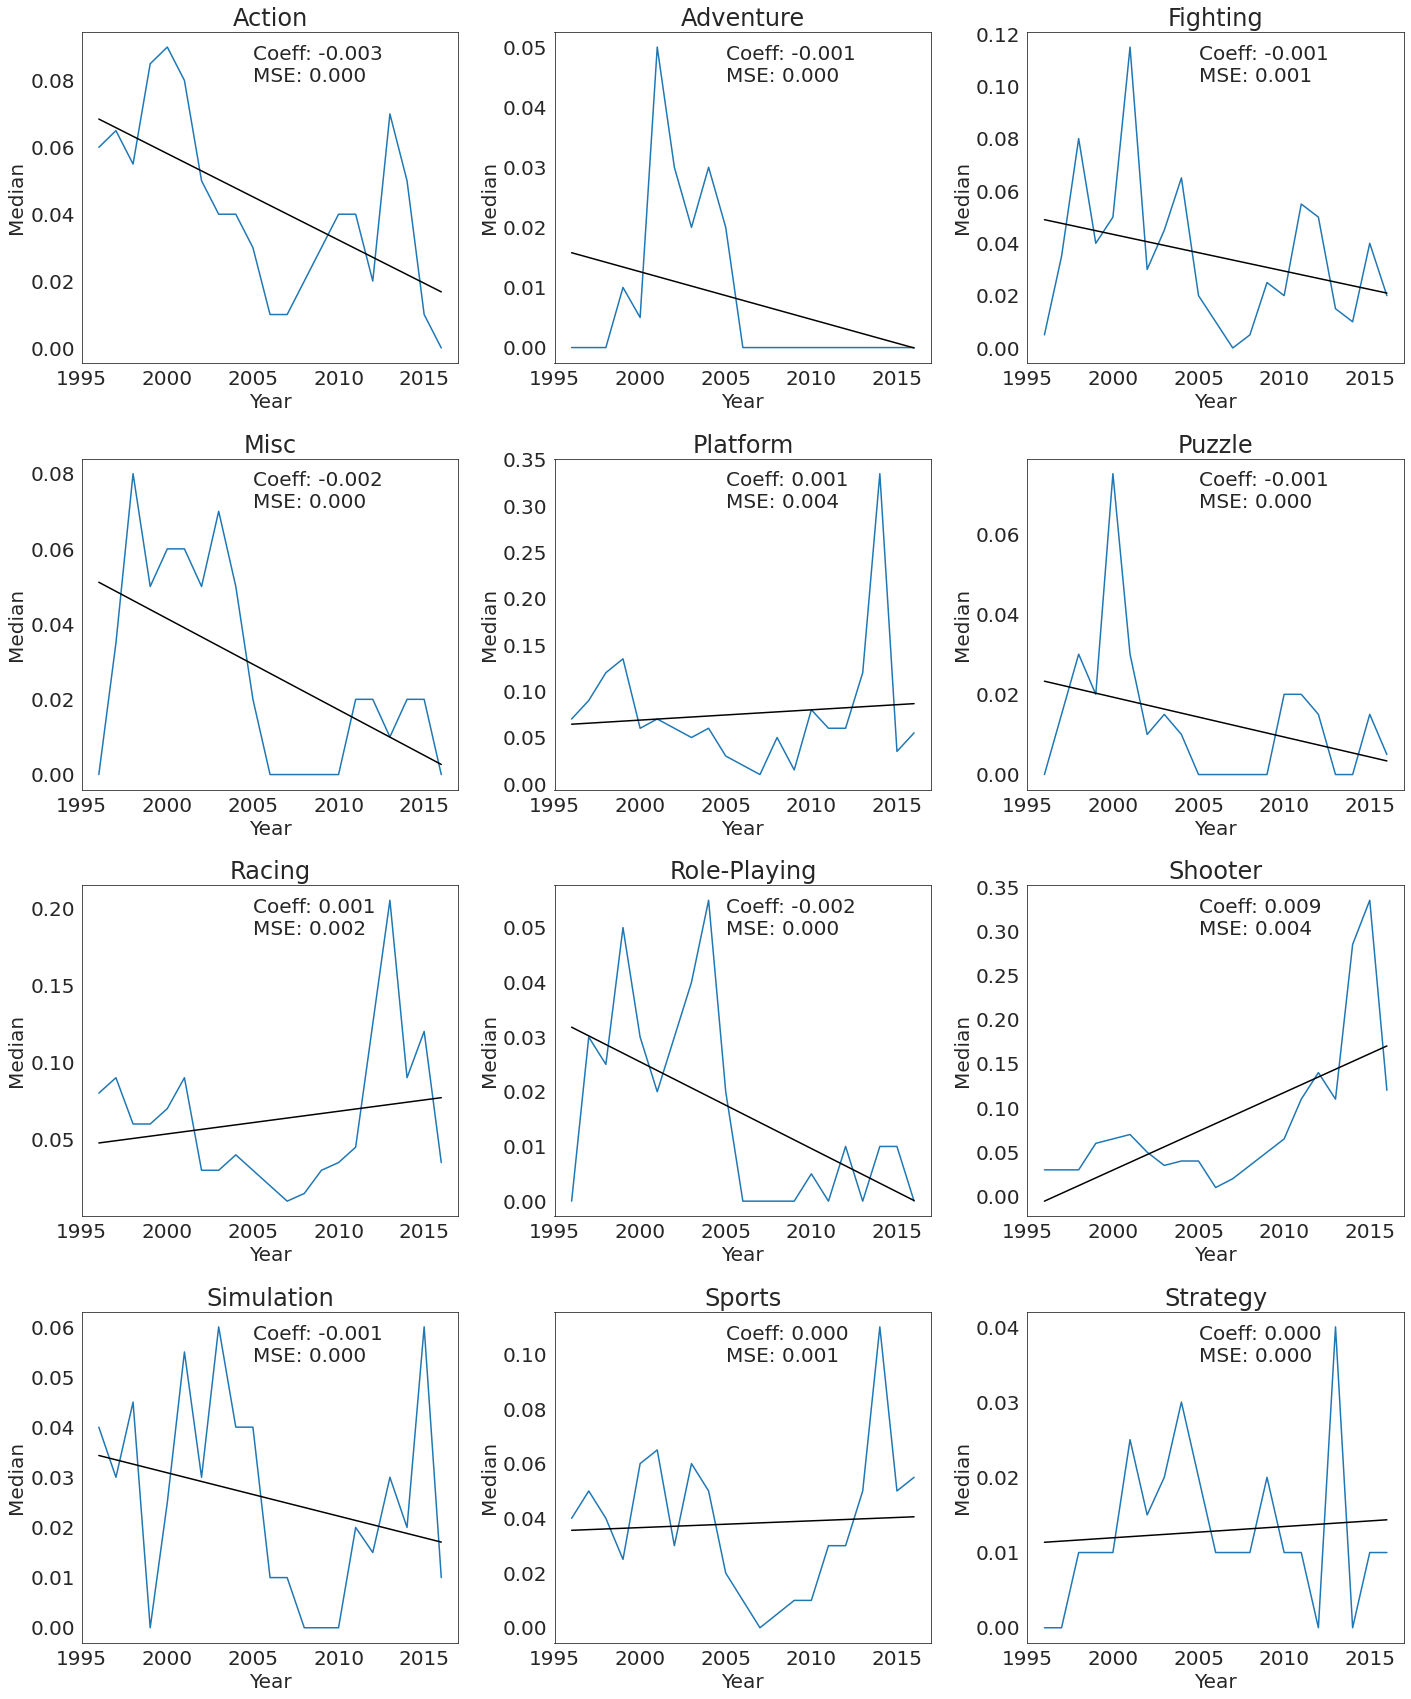

In [45]:
def Linear_Regression_Plot(genre_yr_eu):
    Regr_Coeff = []
    Regr_MSE = []
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20,24))

    x_data = np.transpose(np.matrix(genre_yr_eu.index))

    count = 0
    
    for genre in genre_yr_eu.columns:
        axs = axes[count//3,count%3]
        y_data = genre_yr_eu[genre].to_frame()
    
        # Linear regression
        regr = linear_model.LinearRegression()
        regr.fit(x_data,y_data)
        
        # Mean Squared Error
        MSE = np.mean((regr.predict(x_data)-y_data)**2)
        
        Regr_Coeff.append(regr.coef_[0][0])
        Regr_MSE.append(MSE[0])

        genre_yr_eu[genre].plot(ax=axs)
        axs.plot(x_data,regr.predict(x_data), color='black')

        y_lims = axs.get_ylim()
        
        
        txt = 'Coeff: %.3f \nMSE: %.3f' % (regr.coef_,MSE)
        y_loc = 0.85*(y_lims[1]-y_lims[0])+y_lims[0]
        axs.text(2005,y_loc,txt)

        axs.set_title(genre)
        axs.set_xlabel('Year')
        axs.set_ylabel('Median')
        count+=1
    fig.tight_layout()
    
    return [Regr_Coeff,Regr_MSE]
    
[Regr_Coeff,Regr_MSE] = Linear_Regression_Plot(Med_Sales_Gen_Yr_eu)

European sales differ from North America and japan sales in that they have a nuetral or positive trend for strategy, sports, shooter, racing, and platform games. Shooter games have a higher positive trend than all the others indicating european game sales favor them over the others. The data as a whole shows that european gamers have a more diverse preference of gaming genres.

In [46]:
# check for bias by company means
data_new.groupby('Company').median()
# it appears for Sega they are not focusing on what they are selling more recently compared to the other 3 companies
# and sega has a lower critic review count

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rev_Critic_Score
Company,,,,,,,,,,,
Microsoft,2008.0,0.11,0.05,0.00,0.01,0.200,75.0,29.0,7.30,48.0,7.5
Nintendo,2007.0,0.17,0.04,0.00,0.01,0.280,70.0,18.0,7.50,15.0,7.0
Sega,2000.0,0.00,0.00,0.17,0.00,0.195,88.0,18.0,8.85,40.0,8.8
Sony,2007.0,0.16,0.09,0.00,0.04,0.370,72.0,25.0,7.60,28.0,7.2


In [47]:
#create new df
data_chi = data_new
#make new df and encode genres to test distirbution significance with Genres and Companies
genre_new = {'Genre' : {'Action': 1, 'Adventure': 2, 'Fighting': 3, 'Misc': 4, 'Platform': 5, 'Puzzle': 6, 'Racing': 7, 
                              'Role-Playing': 8 , 'Shooter': 9,'Simulation': 10,'Sports': 11, 'Strategy' : 12}}
labels = data_chi['Genre'].astype('category').cat.categories.tolist()
new_genre = {'Genre' : {k: v for k, v in zip(labels, list (range(1, len(labels)+1)))}}
data_chi.replace(new_genre, inplace = True)
# same for company
company_new = {'Company' : {'Microsoft' : 1, 'Nintendo': 2, 'Sega': 3, 'Sony' : 4}}
labels = data_chi['Company'].astype('category').cat.categories.tolist()
new_company = {'Company' : {k: v for k, v in zip(labels, list (range(1, len(labels)+1)))}}
data_chi.replace(new_company, inplace = True)
print(data_new.groupby('Company').count())

         Name  Platform  Year_of_Release  Genre  Publisher  NA_Sales  \
Company                                                                
1        2377      2377             2377   2377       2377      2377   
2        1827      1827             1827   1827       1827      1827   
3          14        14               14     14         14        14   
4        2894      2894             2894   2894       2894      2894   

         EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
Company                                                                
1            2377      2377         2377          2377          2377   
2            1827      1827         1827          1827          1827   
3              14        14           14            14            14   
4            2894      2894         2894          2894          2894   

         Critic_Count  User_Score  User_Count  Rating  Rev_Critic_Score  
Company                                                     

In [48]:
#set up Chi-Square
genre_table= pd.crosstab(data_new['Genre'], columns = 'count')
print (genre_table)
company_table = pd.crosstab(data_new['Company'], columns = 'count')
print (company_table)

col_0  count
Genre       
1       1698
2        260
3        392
4        399
5        412
6        127
7        600
8        739
9        900
10       312
11       981
12       292
col_0    count
Company       
1         2377
2         1827
3           14
4         2894


In [49]:
#for genres and companies
observed = genre_table

company_ratios = company_table/len(data_new['Company'])  # get ratios

expected = company_ratios * len(data_new['Genre']) # get expected results

chi_squared_stat = (((observed-expected)**2/expected).sum())

print(chi_squared_stat)


col_0
count    13894.970451
dtype: float64


In [50]:
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 33)   # Df = number of variable categories - 1

print("Critical value")
print(crit)

p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=33)
print("P value")
print(p_value)

Critical value
47.39988391908093
P value
[0.]


Since the chi-squared statistics exceeds the critical values we can assume that Genres and Companies are statistically different as well as Genres and Global Sales. Therefore I have shown that both sales in countries and sales by genres distributions are statistically different from global sales.